In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATASETNAME = "player_stats.csv"

#Get the current working directory
filepath = Path.cwd().parent
DATASETNAME = "player_stats.csv"

#Set the correct file path based on the current directory structure
filepath = Path("/Users/katerinadenyakina/Desktop") / DATASETNAME

#Load the dataset
df = pd.read_csv(filepath, encoding='latin1')

#Display the dataframe
print(df.head())  # Preview the data

                     player   country  height  weight   age            club  \
0  Cristian Castro Devenish  Colombia   192.0    84.0  22.0  Atl. Nacional    
1          Silaldo Taffarel    Brazil   181.0    80.0  31.0    Corinthians    
2             Thomas DÃ¤hne   Germany   193.0    84.0  29.0  Holstein Kiel    
3         Michael Sollbauer   Austria   187.0    86.0  33.0  SK Rapid Wien    
4             Diego Segovia   Uruguay   191.0    80.0  23.0  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
0          55.0       43.0      NaN          68.0  ...   32.0    34.0   
1          69.0       70.0      NaN          56.0  ...   65.0    62.0   
2          25.0       12.0      NaN          13.0  ...   20.0    15.0   
3          46.0       48.0      NaN          66.0  ...   25.0    13.0   
4          14.0        8.0      NaN          14.0  ...    9.0    10.0   

   penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0       4

In [3]:
dfColumnAnalysis = pd.DataFrame({"columns": df.columns,
                                 "data Type": df.dtypes.values,
                                 "Total Count": df.count().values,
                                 "Unique Count": df.nunique().values
                                })
dfColumnAnalysis

columns data Type  Total Count  Unique Count
0           player    object         5692          5660
1          country    object         5690           142
2           height   float64         5690            52
3           weight   float64         5682            49
4              age   float64         5690            29
5             club    object         5690           697
6     ball_control   float64         5682            87
7        dribbling   float64         5682            89
8          marking   float64            8             8
9     slide_tackle   float64         5682            81
10    stand_tackle   float64         5682            83
11      aggression   float64         5682            85
12       reactions   float64         5682            64
13    att_position   float64         5682            91
14   interceptions   float64         5682            83
15          vision   float64         5682            78
16       composure   float64         5682            76
17        crossing   float64         5682            86
18      short_pass   float64         5682            83
19       long_pass   float64         5682            83
20    acceleration   float64         5682            84
21         stamina   float64         5682            82
22        strength   float64         5682            70
23         balance   float64         5682            76
24    sprint_speed   float64         5682            84
25         agility   float64         5682            74
26         jumping   float64         5682            70
27         heading   float64         5682            87
28      shot_power   float64         5682            75
29       finishing   float64         5682            91
30      long_shots   float64         5682            85
31           curve   float64         5682            86
32          fk_acc   float64         5682            88
33       penalties   float64         5682            85
34         volleys   float64         5682            86
35  gk_positioning    object         5682            70
36       gk_diving   float64         5674            57
37     gk_handling   float64         5674            57
38      gk_kicking   float64         5674            62
39     gk_reflexes   float64         5674            62
40           value    object         5674           191

In [4]:
#Numpy strings != python strings so they appear as objects
#value needs to be converted to float
df["value"] = df["value"].replace('[^\d]', '', regex=True).astype(float)

#Strings cannot be used in regression based ml - transformation needed for "country" & "club" - one hot encoding?
#for now, we will continue exploring, we will analyse these columns seperately from the integer based ones
stringColumns = ["player","country", "club"]
df.dtypes

player             object
country            object
height            float64
weight            float64
age               float64
club               object
ball_control      float64
dribbling         float64
marking           float64
slide_tackle      float64
stand_tackle      float64
aggression        float64
reactions         float64
att_position      float64
interceptions     float64
vision            float64
composure         float64
crossing          float64
short_pass        float64
long_pass         float64
acceleration      float64
stamina           float64
strength          float64
balance           float64
sprint_speed      float64
agility           float64
jumping           float64
heading           float64
shot_power        float64
finishing         float64
long_shots        float64
curve             float64
fk_acc            float64
penalties         float64
volleys           float64
gk_positioning     object
gk_diving         float64
gk_handling       float64
gk_kicking  

In [5]:
#Marking column contains no values, double check this by checking entire df for null values:
ContainsNullValues = df.isnull().values.any() 
print("does dataset contain null values: ", ContainsNullValues)
if ContainsNullValues:
    print("null values found in columns: \n", df.isnull().sum())

does dataset contain null values:  True
null values found in columns: 
 player               0
country              2
height               2
weight              10
age                  2
club                 2
ball_control        10
dribbling           10
marking           5684
slide_tackle        10
stand_tackle        10
aggression          10
reactions           10
att_position        10
interceptions       10
vision              10
composure           10
crossing            10
short_pass          10
long_pass           10
acceleration        10
stamina             10
strength            10
balance             10
sprint_speed        10
agility             10
jumping             10
heading             10
shot_power          10
finishing           10
long_shots          10
curve               10
fk_acc              10
penalties           10
volleys             10
gk_positioning      10
gk_diving           18
gk_handling         18
gk_kicking          18
gk_reflexes         18
value   

In [6]:
# Entire marking column is null - will need to be removed
df = df.drop("marking", axis=1)
df.isnull().values.any() 

True

In [7]:
#Player is our identifier, seeing that its unique count does not match the total count, implies there are duplicates
ContainsDuplicates = df.duplicated().any() 
print("does dataset contain duplicate values: ", ContainsDuplicates)
if ContainsDuplicates:
    #set keep to false, so it flags all occurances of duplicated rows
    print("total duplicates found:", df.duplicated(keep=False).sum())
    print("following rows were found to have duplicates:\n",df[df.duplicated(keep=False).values])
    #we will keep the first occurances of these rows (keep="first" by default)
    df = df.drop_duplicates()

#Check all changes
dfColumnAnalysis = pd.DataFrame({"columns": df.columns,
                                 "data Type": df.dtypes.values,
                                 "Total Count": df.count().values,
                                 "Unique Count": df.nunique().values
                                })
dfColumnAnalysis

does dataset contain duplicate values:  True
total duplicates found: 6
following rows were found to have duplicates:
               player  country  height  weight   age            club  \
155  Maxime CrÃ©peau   Canada   180.0    88.0  29.0           LAFC    
157   Stefan Thesker  Germany   190.0    84.0  32.0  Holstein Kiel    
158     Cameron John  England   181.0    78.0  24.0       Rochdale    
159  Maxime CrÃ©peau   Canada   180.0    88.0  29.0           LAFC    
160   Stefan Thesker  Germany   190.0    84.0  32.0  Holstein Kiel    
161     Cameron John  England   181.0    78.0  24.0       Rochdale    

     ball_control  dribbling  slide_tackle  stand_tackle  ...  curve  fk_acc  \
155          45.0       19.0          17.0          17.0  ...   16.0    14.0   
157          55.0       45.0          64.0          70.0  ...   33.0    31.0   
158          55.0       53.0          57.0          60.0  ...   34.0    25.0   
159          45.0       19.0          17.0          17.0  ...   

columns data Type  Total Count  Unique Count
0           player    object         5689          5660
1          country    object         5687           142
2           height   float64         5687            52
3           weight   float64         5679            49
4              age   float64         5687            29
5             club    object         5687           697
6     ball_control   float64         5679            87
7        dribbling   float64         5679            89
8     slide_tackle   float64         5679            81
9     stand_tackle   float64         5679            83
10      aggression   float64         5679            85
11       reactions   float64         5679            64
12    att_position   float64         5679            91
13   interceptions   float64         5679            83
14          vision   float64         5679            78
15       composure   float64         5679            76
16        crossing   float64         5679            86
17      short_pass   float64         5679            83
18       long_pass   float64         5679            83
19    acceleration   float64         5679            84
20         stamina   float64         5679            82
21        strength   float64         5679            70
22         balance   float64         5679            76
23    sprint_speed   float64         5679            84
24         agility   float64         5679            74
25         jumping   float64         5679            70
26         heading   float64         5679            87
27      shot_power   float64         5679            75
28       finishing   float64         5679            91
29      long_shots   float64         5679            85
30           curve   float64         5679            86
31          fk_acc   float64         5679            88
32       penalties   float64         5679            85
33         volleys   float64         5679            86
34  gk_positioning    object         5679            70
35       gk_diving   float64         5671            57
36     gk_handling   float64         5671            57
37      gk_kicking   float64         5671            62
38     gk_reflexes   float64         5671            62
39           value   float64         5671           191

In [8]:
#unique player count still does not match actual player count - lets check duplicates in player column
ContainsDuplicates = df.duplicated(subset=["player"]).any() 
print("does dataset contain duplicate values: ", ContainsDuplicates)
if ContainsDuplicates:
    #set keep to false, so it flags all occurances of duplicated rows
    print("total duplicates found:", df.duplicated(keep=False,subset=["player"]).sum())
    print("following rows were found to have duplicates:\n",df[df.duplicated(keep=False,subset=["player"]).values].sort_values(by=["player"]))
    #we will keep the first occurances of these rows (keep="first" by default)
    #df = df.drop_duplicates(subset=["player"])

does dataset contain duplicate values:  True
total duplicates found: 50
following rows were found to have duplicates:
                 player         country  height  weight   age  \
2656     Curtis Davies         England   188.0    76.0  38.0   
1569     Curtis Davies         England   173.0    70.0  19.0   
2373        Danny Ward         England   180.0    72.0  32.0   
4140        Danny Ward           Wales   191.0    88.0  30.0   
4430      Diego LÃ³pez           Spain   196.0    89.0  41.0   
1005      Diego LÃ³pez           Spain   172.0    63.0  21.0   
2438  Emmanuel Boateng           Ghana   175.0    70.0  27.0   
5328  Emmanuel Boateng           Ghana   168.0    68.0  29.0   
4971  Emmanuel Boateng           Ghana   174.0    66.0  26.0   
2966       Greg Taylor         England   186.0    73.0  33.0   
3086       Greg Taylor        Scotland   170.0    68.0  25.0   
3115     Jack Hamilton        Scotland   189.0    75.0  29.0   
5164     Jack Hamilton        Scotland   187.0   

In [9]:
# Player names (& country) seem to be duplicated, data, possible that some of these are outdated data from prev version
# all data is grabbed from the fifa Index - will need to check what to do with this - for now will ignore and continue

#player column is no longer needed for analysis
df = df.drop("player", axis=1)
stringColumns.remove("player")

XInts = df.drop("value",axis=1).drop(stringColumns,axis=1)
xStrings = df[stringColumns]
Y = df["value"]
df

country  height  weight   age               club  ball_control  \
0     Colombia   192.0    84.0  22.0     Atl. Nacional           55.0   
1       Brazil   181.0    80.0  31.0       Corinthians           69.0   
2      Germany   193.0    84.0  29.0     Holstein Kiel           25.0   
3      Austria   187.0    86.0  33.0     SK Rapid Wien           46.0   
4      Uruguay   191.0    80.0  23.0     Independiente           14.0   
...        ...     ...     ...   ...                ...           ...   
5687     Egypt   175.0    71.0  31.0          Liverpool          86.0   
5688   Senegal   174.0    69.0  31.0  FC Bayern München          86.0   
5689    Brazil   175.0    68.0  31.0           Paris SG          94.0   
5690  Portugal   187.0    83.0  38.0           Al Nassr          87.0   
5691    Sweden   195.0   102.0  41.0              Milan          85.0   

      dribbling  slide_tackle  stand_tackle  aggression  ...  curve  fk_acc  \
0          43.0          68.0          73.0        72.0  ...   32.0    34.0   
1          70.0          56.0          58.0        62.0  ...   65.0    62.0   
2          12.0          13.0          16.0        27.0  ...   20.0    15.0   
3          48.0          66.0          69.0        71.0  ...   25.0    13.0   
4           8.0          14.0          16.0        28.0  ...    9.0    10.0   
...         ...           ...           ...         ...  ...    ...     ...   
5687       88.0          41.0          43.0        63.0  ...   84.0    69.0   
5688       88.0          38.0          42.0        75.0  ...   77.0    64.0   
5689       95.0          29.0          32.0        63.0  ...   88.0    87.0   
5690       81.0          24.0          32.0        62.0  ...   79.0    75.0   
5691       75.0          24.0          37.0        84.0  ...   79.0    74.0   

      penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0          41.0     33.0              10       11.0          6.0         7.0   
1          48.0     46.0              12       15.0         14.0         8.0   
2          26.0     16.0              64       74.0         65.0        68.0   
3          22.0     19.0              10       10.0          8.0        14.0   
4          16.0      5.0              61       59.0         62.0        64.0   
...         ...      ...             ...        ...          ...         ...   
5687       86.0     83.0              11       14.0         14.0         9.0   
5688       75.0     75.0               7       10.0         10.0        15.0   
5689       91.0     86.0              15        9.0          9.0        15.0   
5690       90.0     85.0              14        7.0         11.0        15.0   
5691       80.0     87.0               9       13.0         15.0        10.0   

      gk_reflexes        value  
0             9.0    1400000.0  
1            14.0      97500.0  
2            74.0    1100000.0  
3             9.0      65000.0  
4            64.0      30000.0  
...           ...          ...  
5687         14.0   99500000.0  
5688         14.0  101000000.0  
5689         11.0   99500000.0  
5690         11.0   31000000.0  
5691         12.0   10500000.0  

[5689 rows x 39 columns]

In [10]:
XInts


height  weight   age  ball_control  dribbling  slide_tackle  \
0      192.0    84.0  22.0          55.0       43.0          68.0   
1      181.0    80.0  31.0          69.0       70.0          56.0   
2      193.0    84.0  29.0          25.0       12.0          13.0   
3      187.0    86.0  33.0          46.0       48.0          66.0   
4      191.0    80.0  23.0          14.0        8.0          14.0   
...      ...     ...   ...           ...        ...           ...   
5687   175.0    71.0  31.0          86.0       88.0          41.0   
5688   174.0    69.0  31.0          86.0       88.0          38.0   
5689   175.0    68.0  31.0          94.0       95.0          29.0   
5690   187.0    83.0  38.0          87.0       81.0          24.0   
5691   195.0   102.0  41.0          85.0       75.0          24.0   

      stand_tackle  aggression  reactions  att_position  ...  long_shots  \
0             73.0        72.0       68.0          30.0  ...        31.0   
1             58.0        62.0       70.0          69.0  ...        68.0   
2             16.0        27.0       65.0          17.0  ...        20.0   
3             69.0        71.0       64.0          48.0  ...        33.0   
4             16.0        28.0       50.0          10.0  ...         6.0   
...            ...         ...        ...           ...  ...         ...   
5687          43.0        63.0       92.0          91.0  ...        84.0   
5688          42.0        75.0       91.0          90.0  ...        78.0   
5689          32.0        63.0       88.0          86.0  ...        81.0   
5690          32.0        62.0       90.0          93.0  ...        88.0   
5691          37.0        84.0       77.0          88.0  ...        85.0   

      curve  fk_acc  penalties  volleys  gk_positioning  gk_diving  \
0      32.0    34.0       41.0     33.0              10       11.0   
1      65.0    62.0       48.0     46.0              12       15.0   
2      20.0    15.0       26.0     16.0              64       74.0   
3      25.0    13.0       22.0     19.0              10       10.0   
4       9.0    10.0       16.0      5.0              61       59.0   
...     ...     ...        ...      ...             ...        ...   
5687   84.0    69.0       86.0     83.0              11       14.0   
5688   77.0    64.0       75.0     75.0               7       10.0   
5689   88.0    87.0       91.0     86.0              15        9.0   
5690   79.0    75.0       90.0     85.0              14        7.0   
5691   79.0    74.0       80.0     87.0               9       13.0   

      gk_handling  gk_kicking  gk_reflexes  
0             6.0         7.0          9.0  
1            14.0         8.0         14.0  
2            65.0        68.0         74.0  
3             8.0        14.0          9.0  
4            62.0        64.0         64.0  
...           ...         ...          ...  
5687         14.0         9.0         14.0  
5688         10.0        15.0         14.0  
5689          9.0        15.0         11.0  
5690         11.0        15.0         11.0  
5691         15.0        10.0         12.0  

[5689 rows x 36 columns]

In [11]:
xStrings


country               club
0     Colombia     Atl. Nacional 
1       Brazil       Corinthians 
2      Germany     Holstein Kiel 
3      Austria     SK Rapid Wien 
4      Uruguay     Independiente 
...        ...                ...
5687     Egypt          Liverpool
5688   Senegal  FC Bayern München
5689    Brazil           Paris SG
5690  Portugal           Al Nassr
5691    Sweden              Milan

[5689 rows x 2 columns]

In [12]:
Y

0         1400000.0
1           97500.0
2         1100000.0
3           65000.0
4           30000.0
           ...     
5687     99500000.0
5688    101000000.0
5689     99500000.0
5690     31000000.0
5691     10500000.0
Name: value, Length: 5689, dtype: float64

36


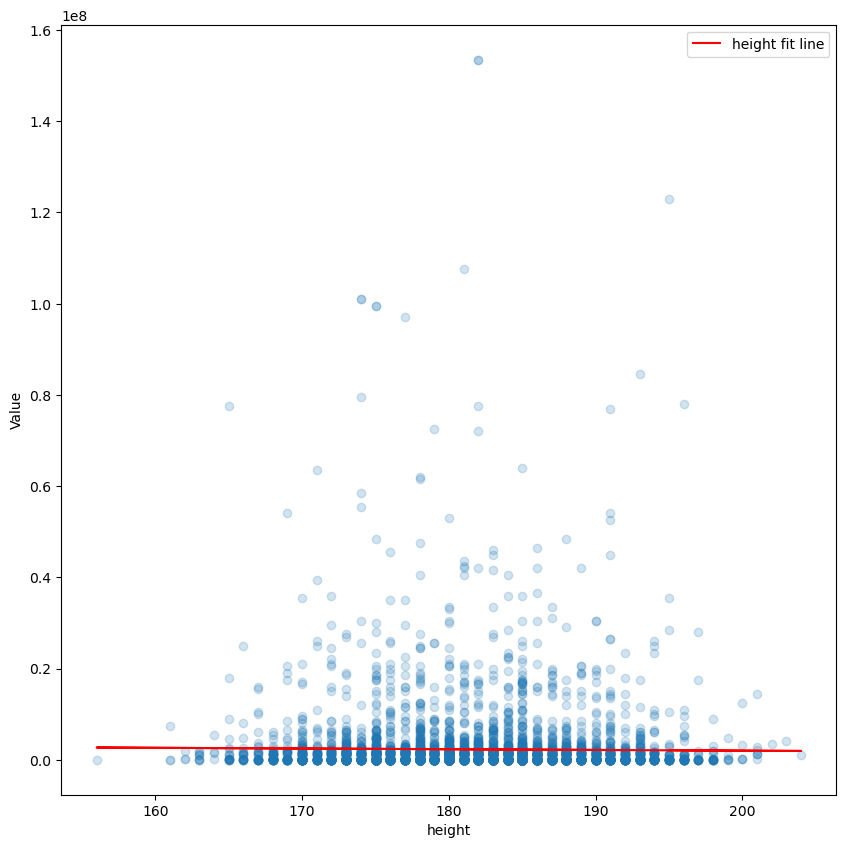

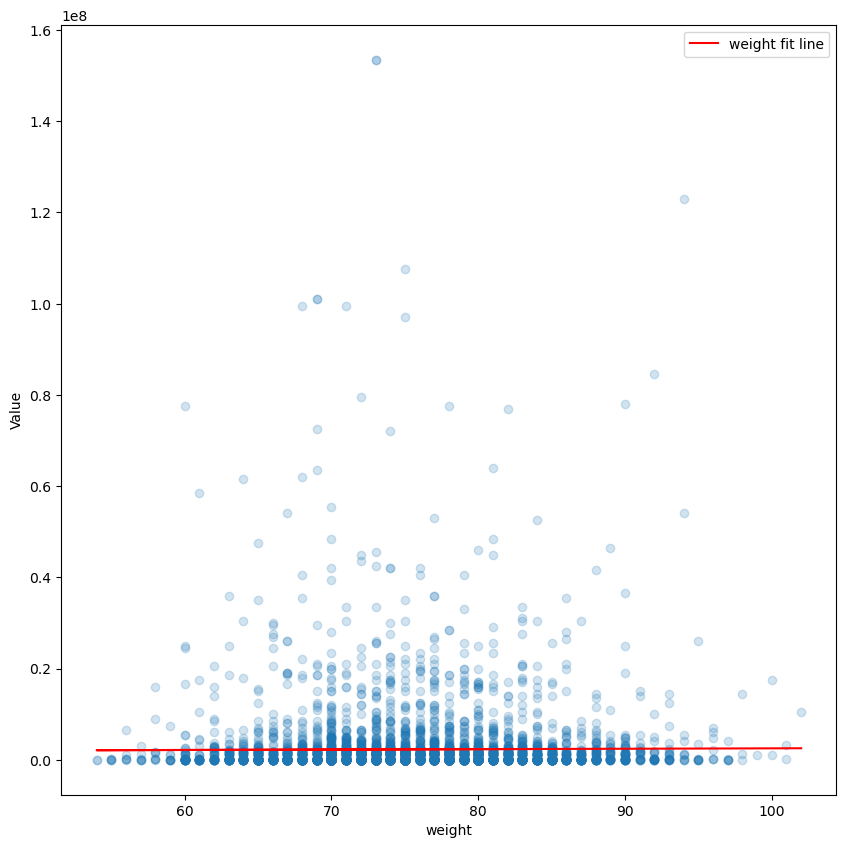

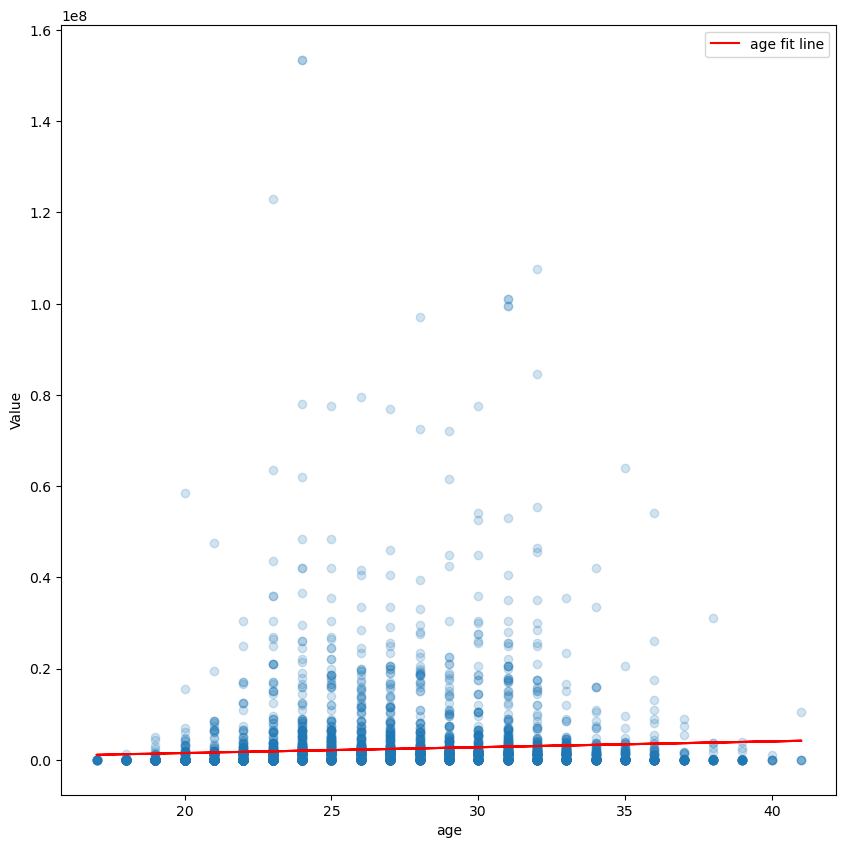

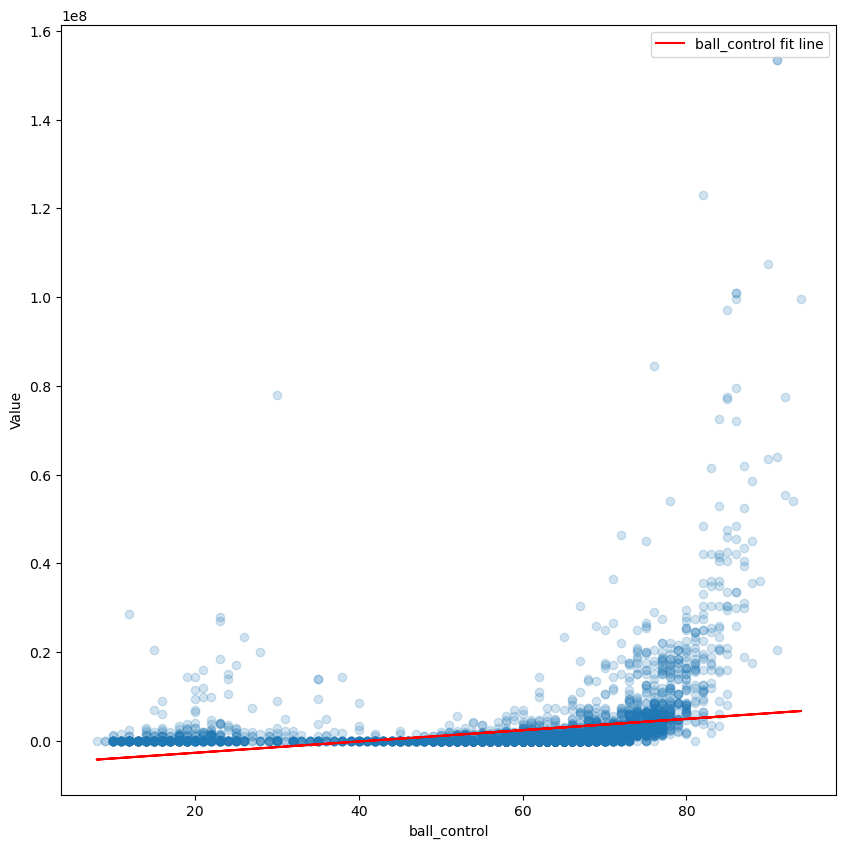

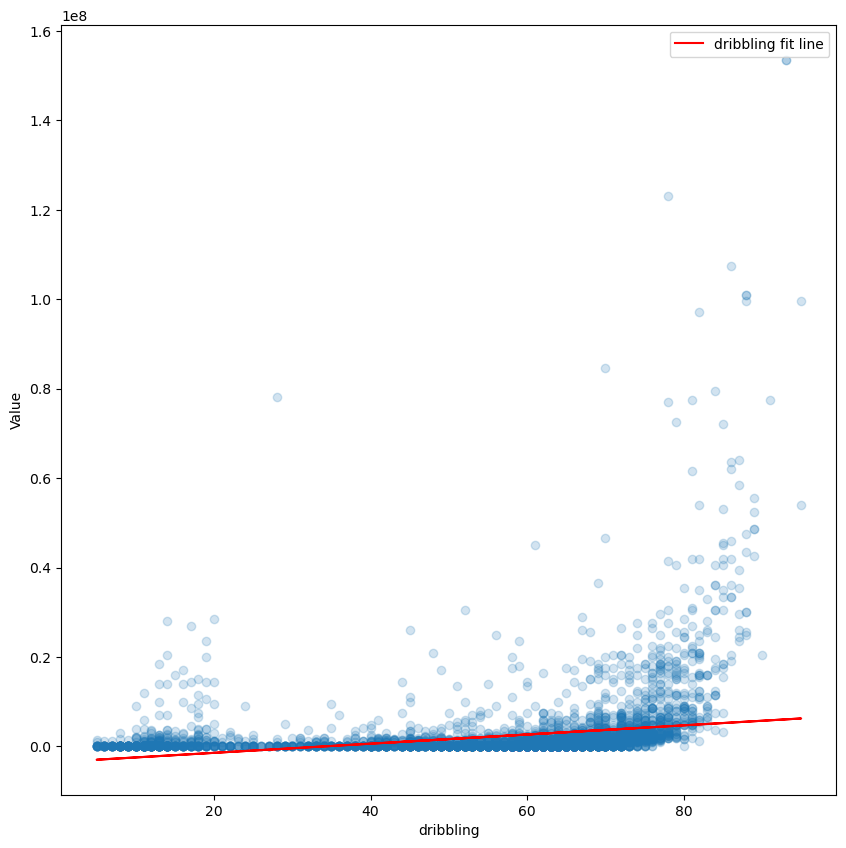

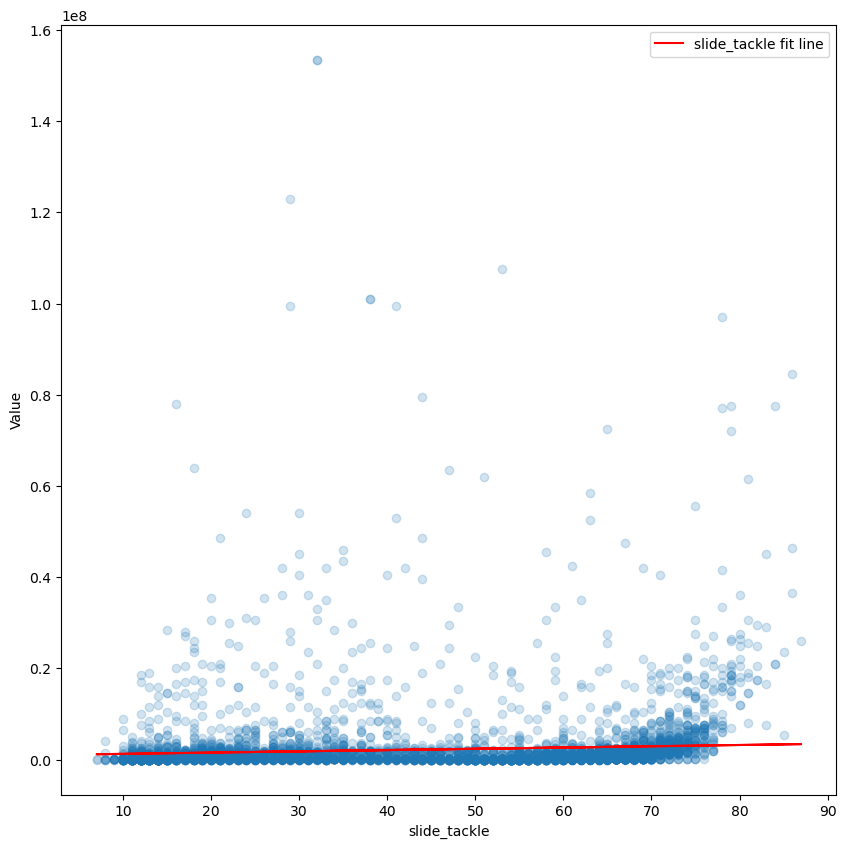

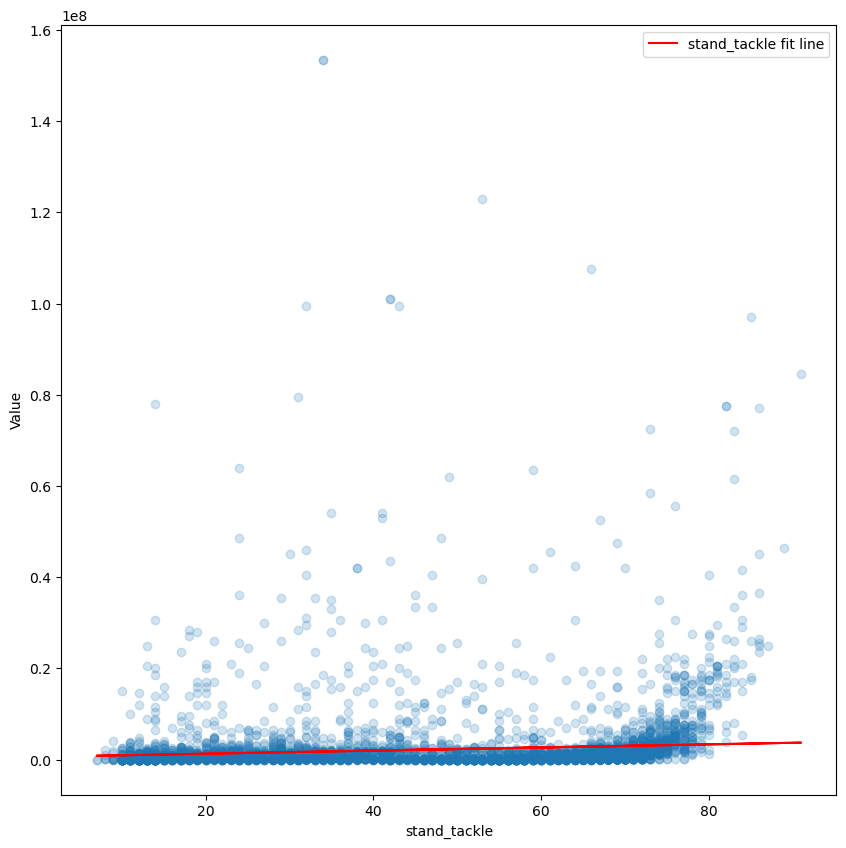

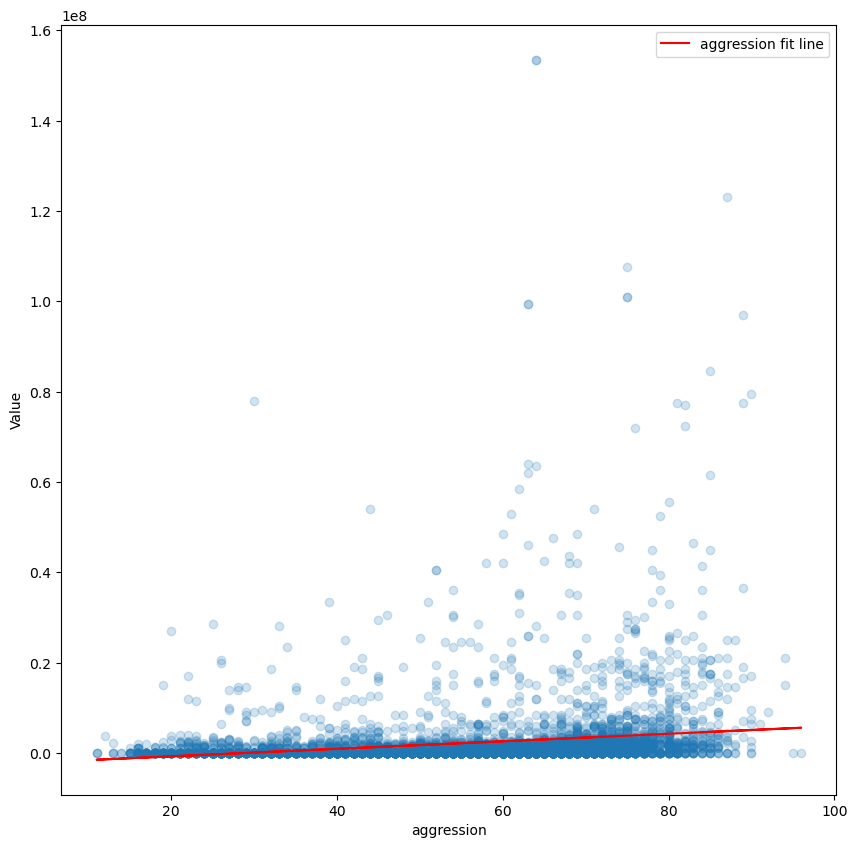

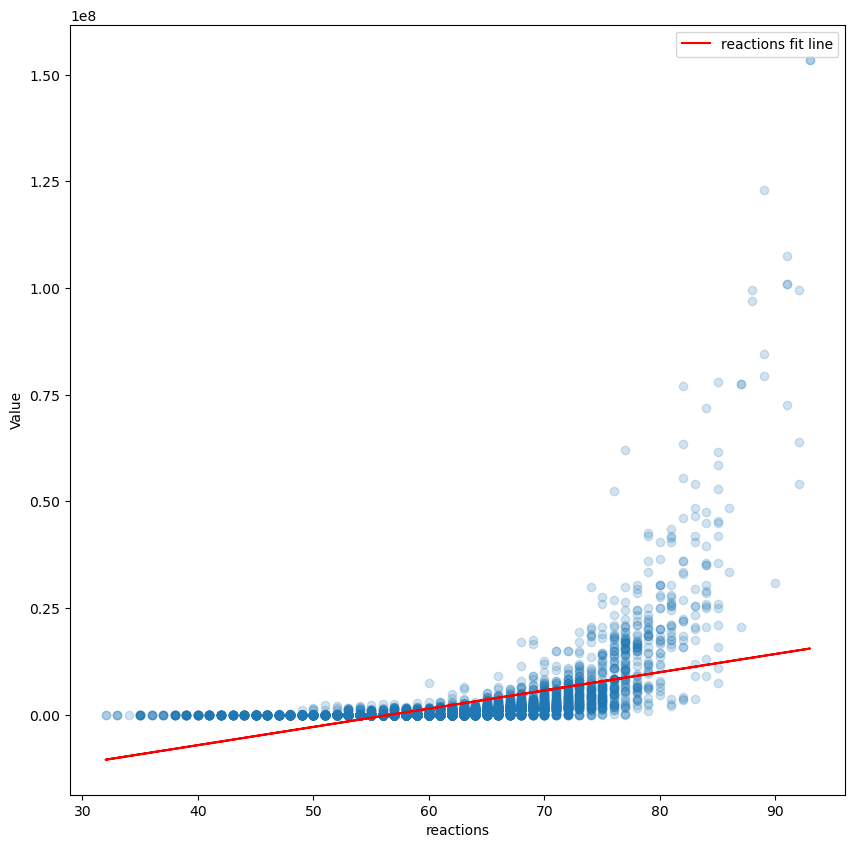

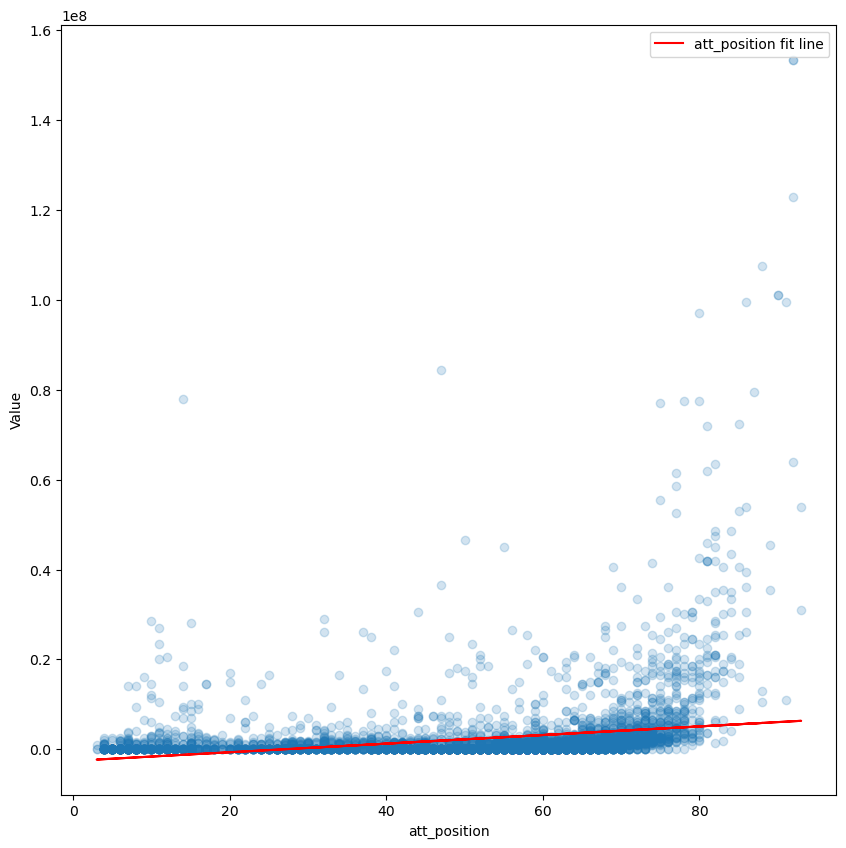

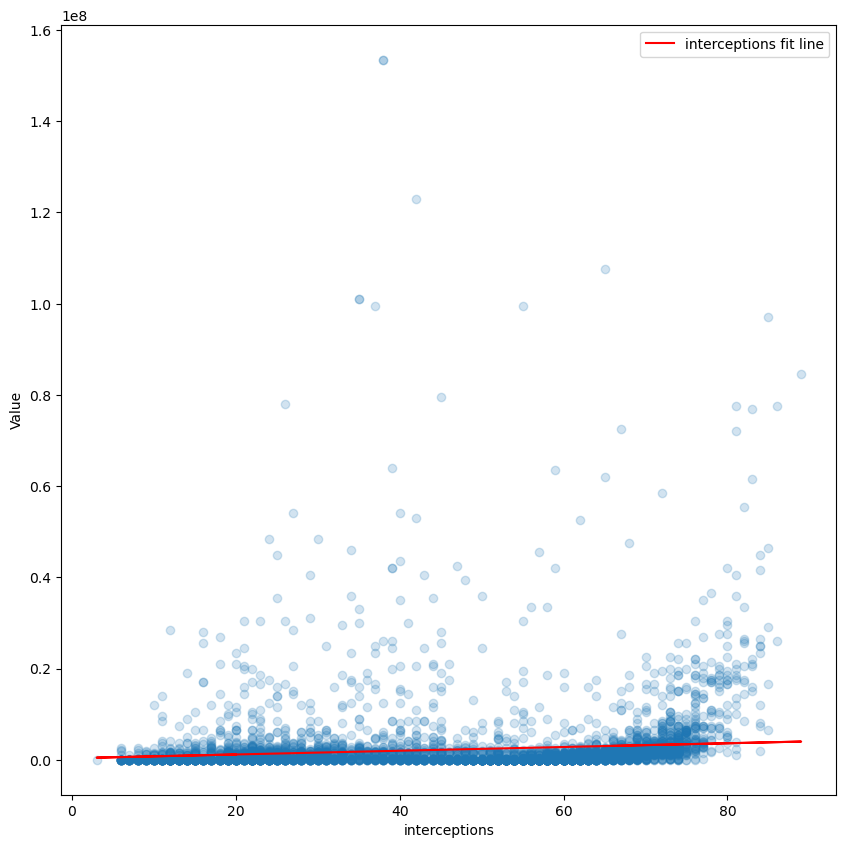

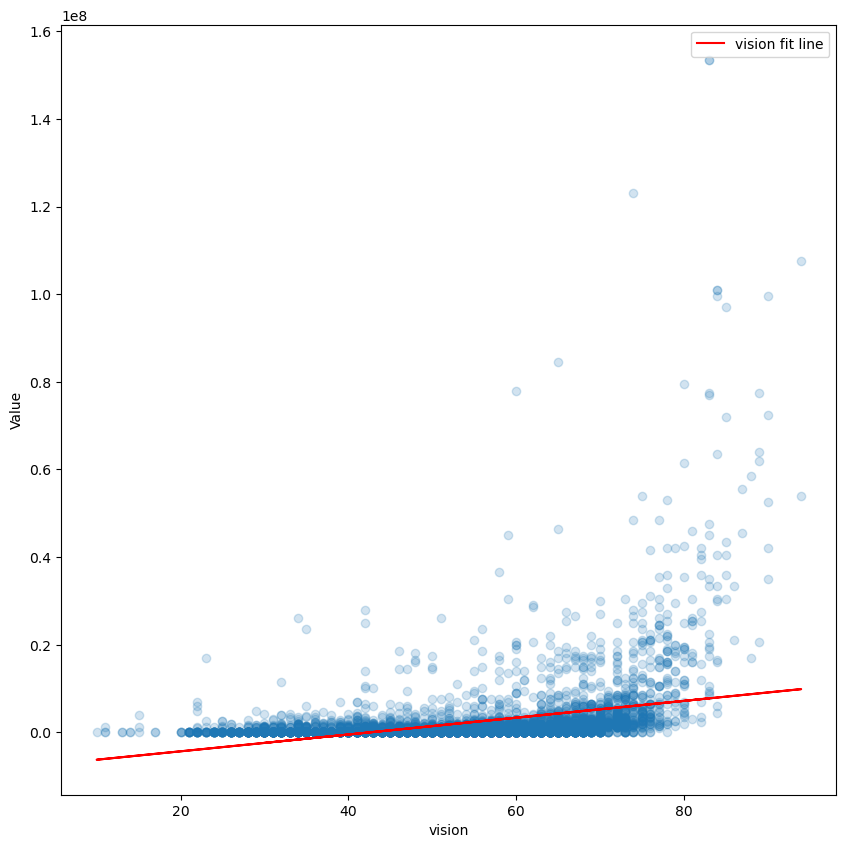

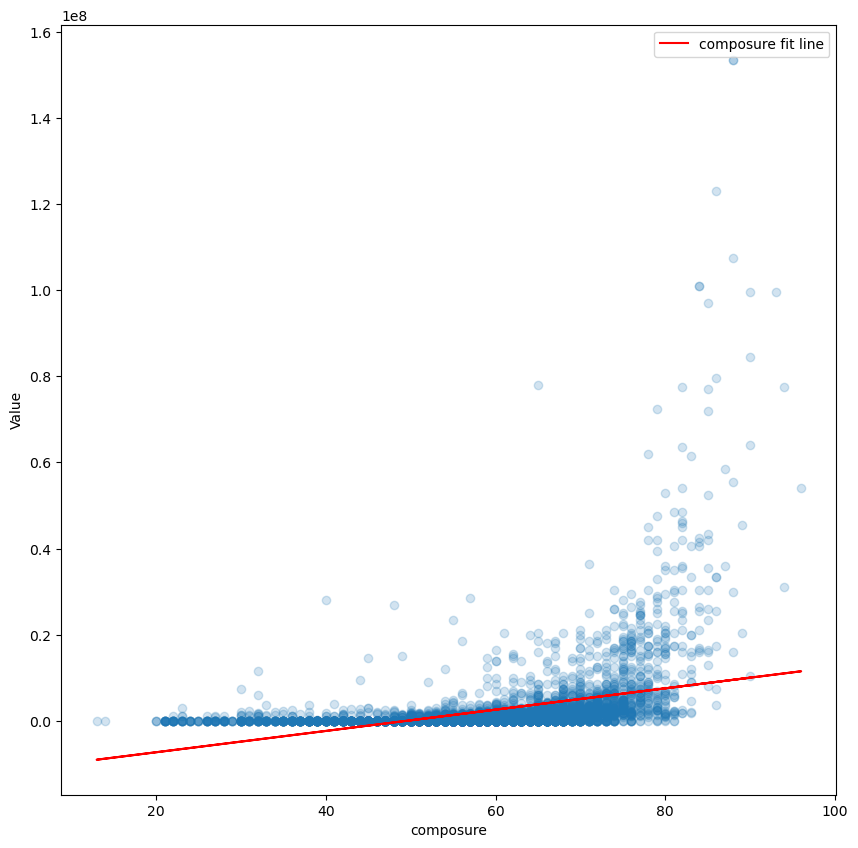

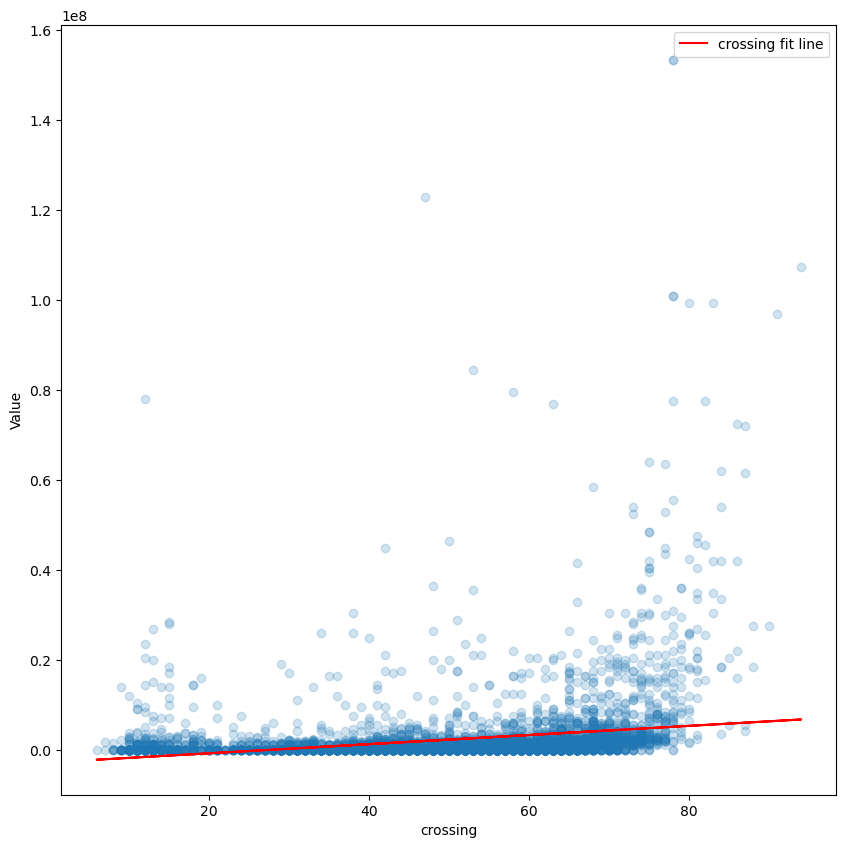

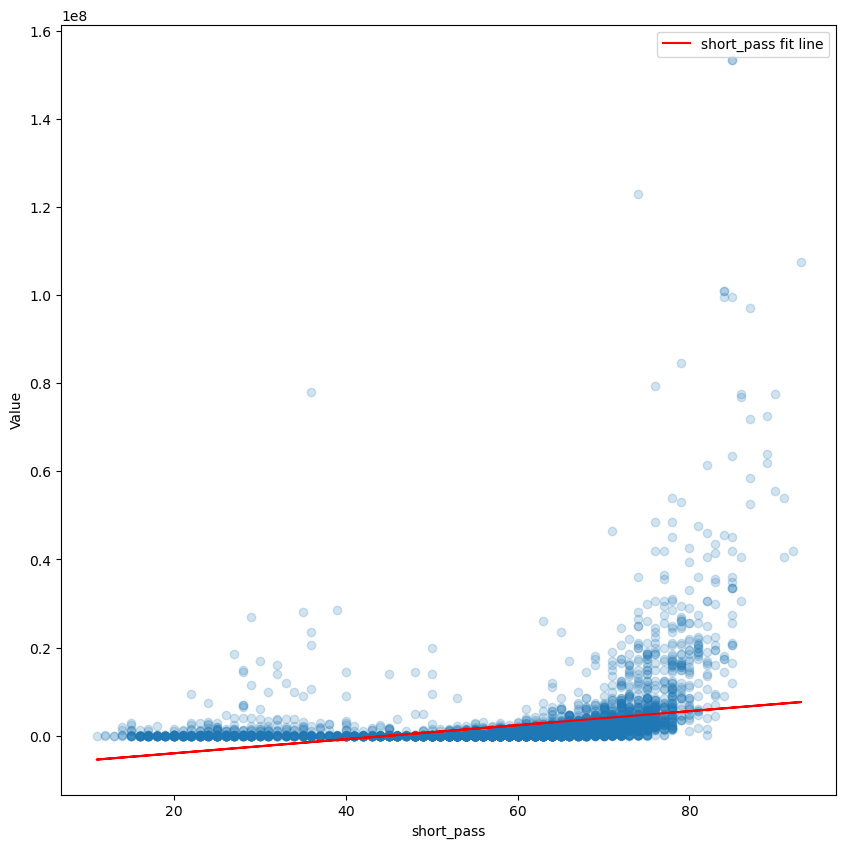

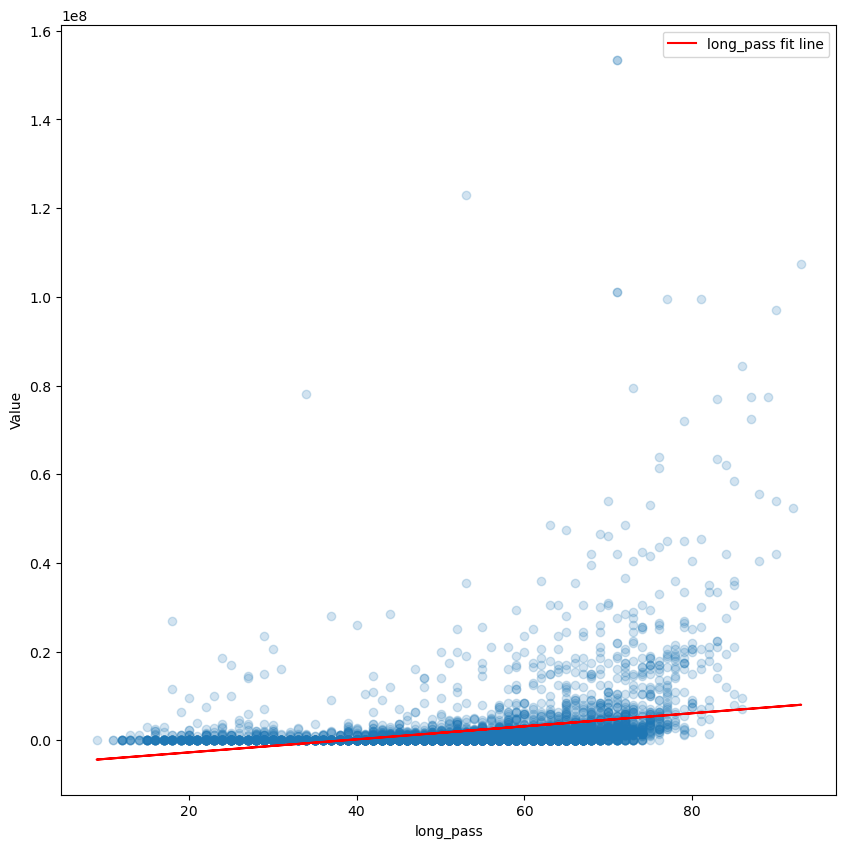

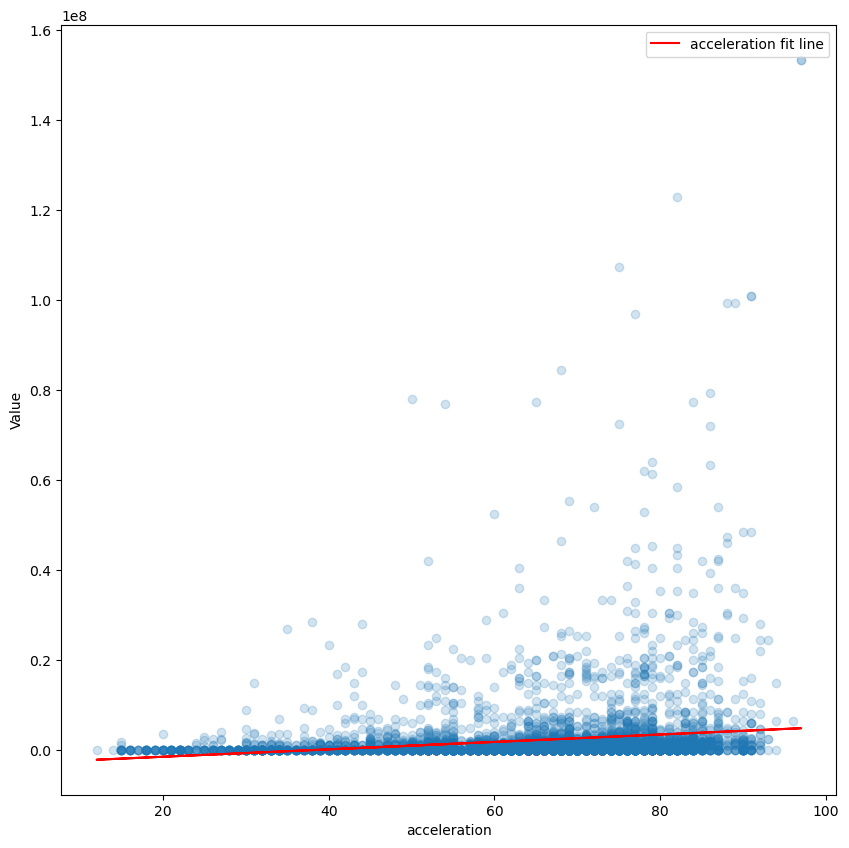

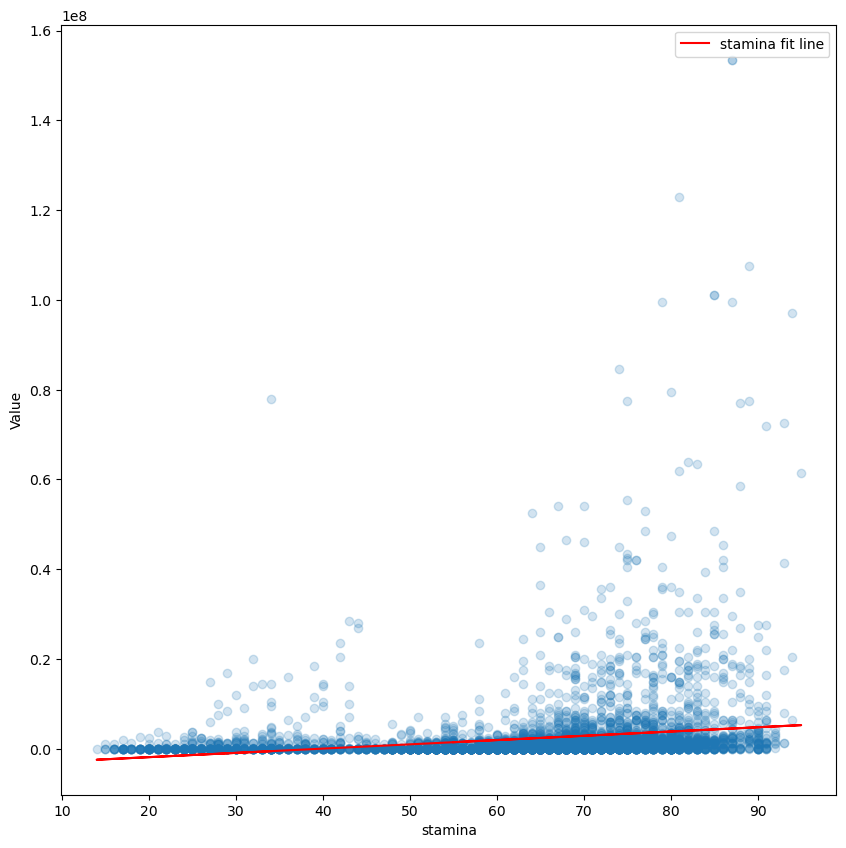

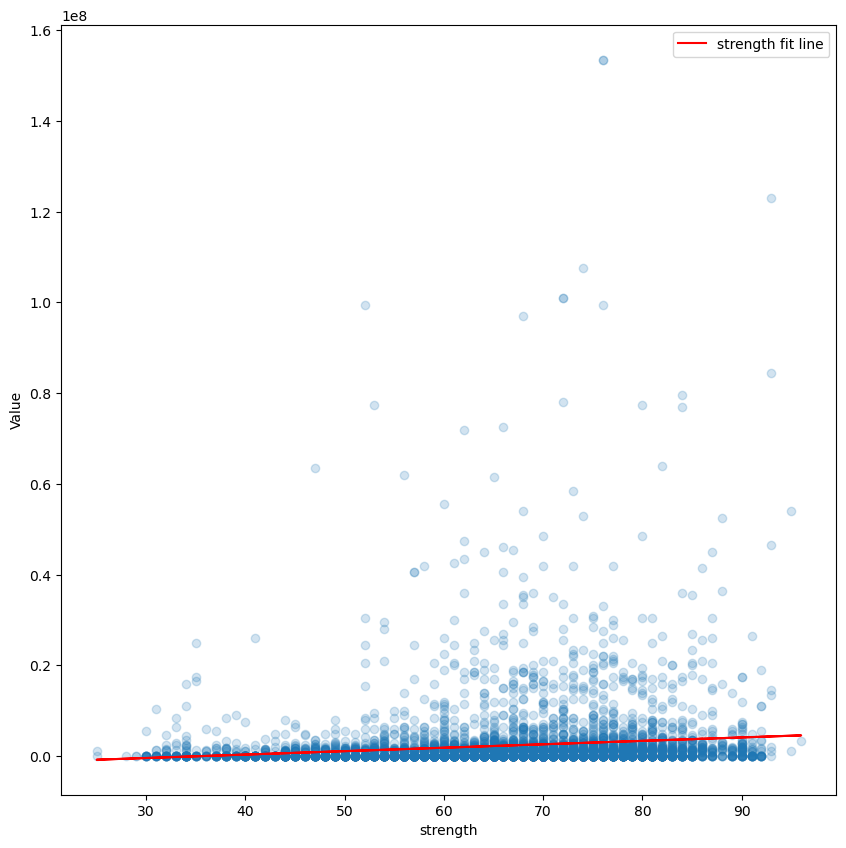

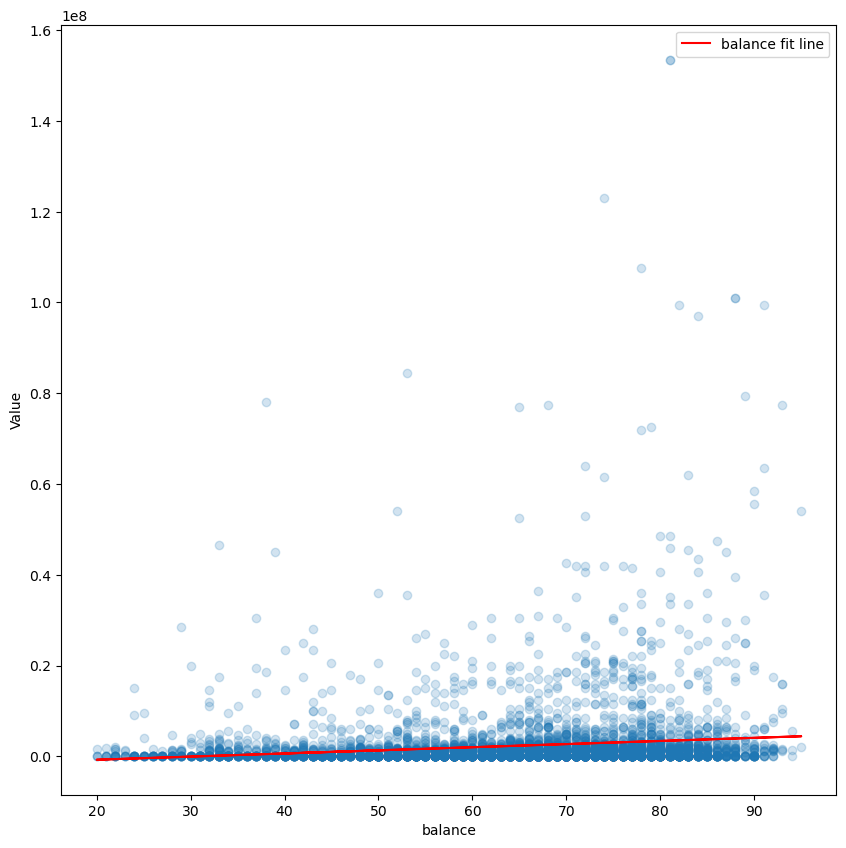

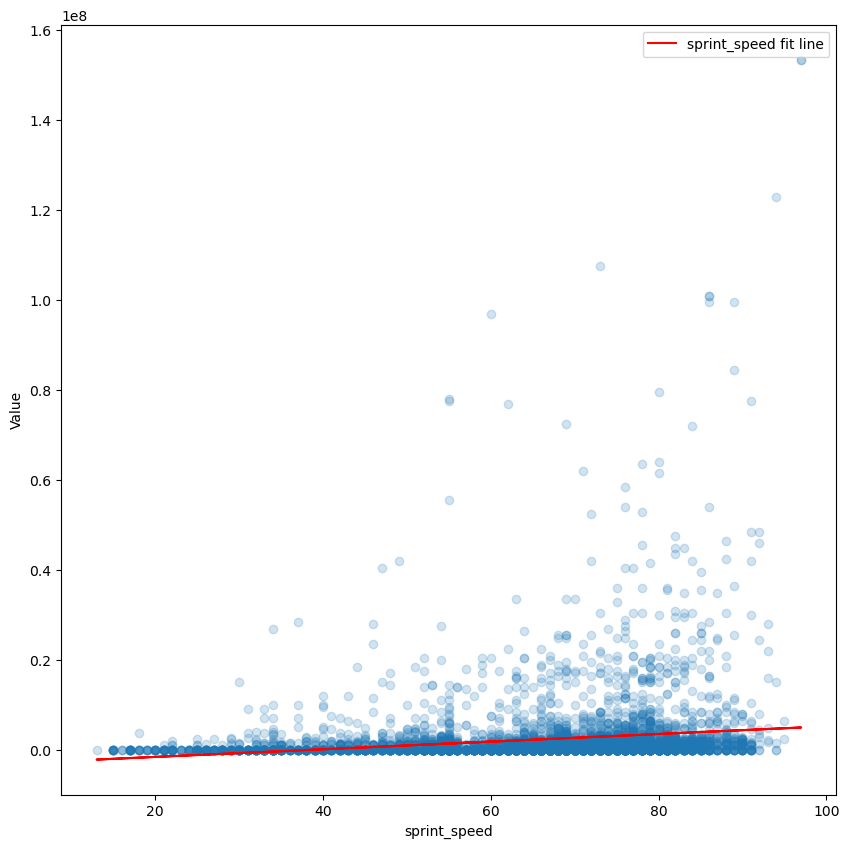

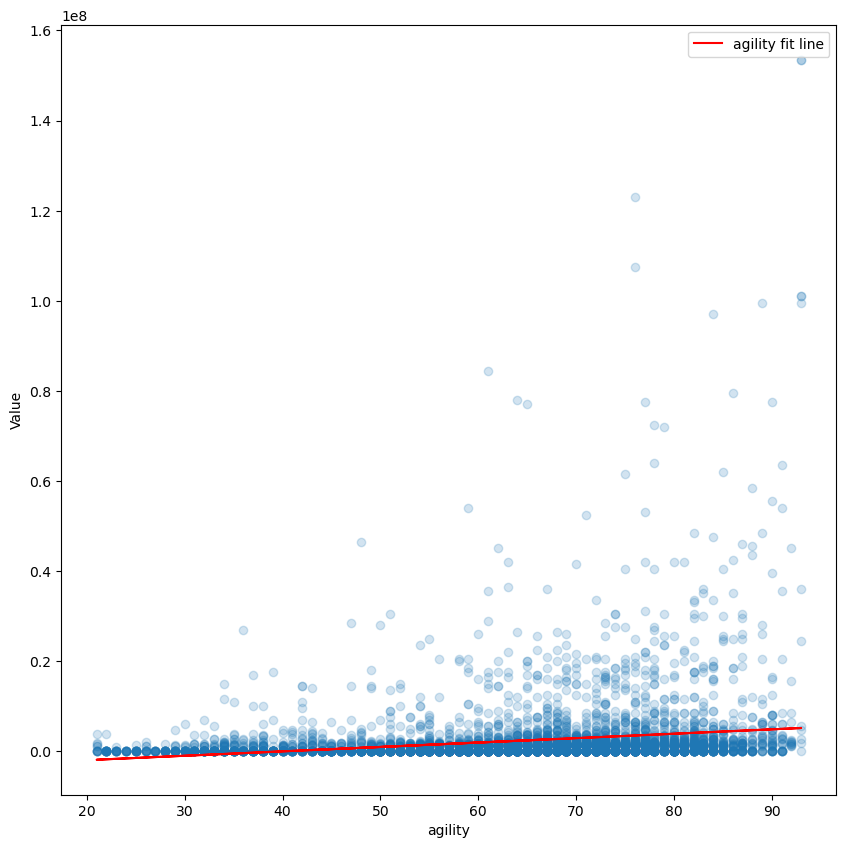

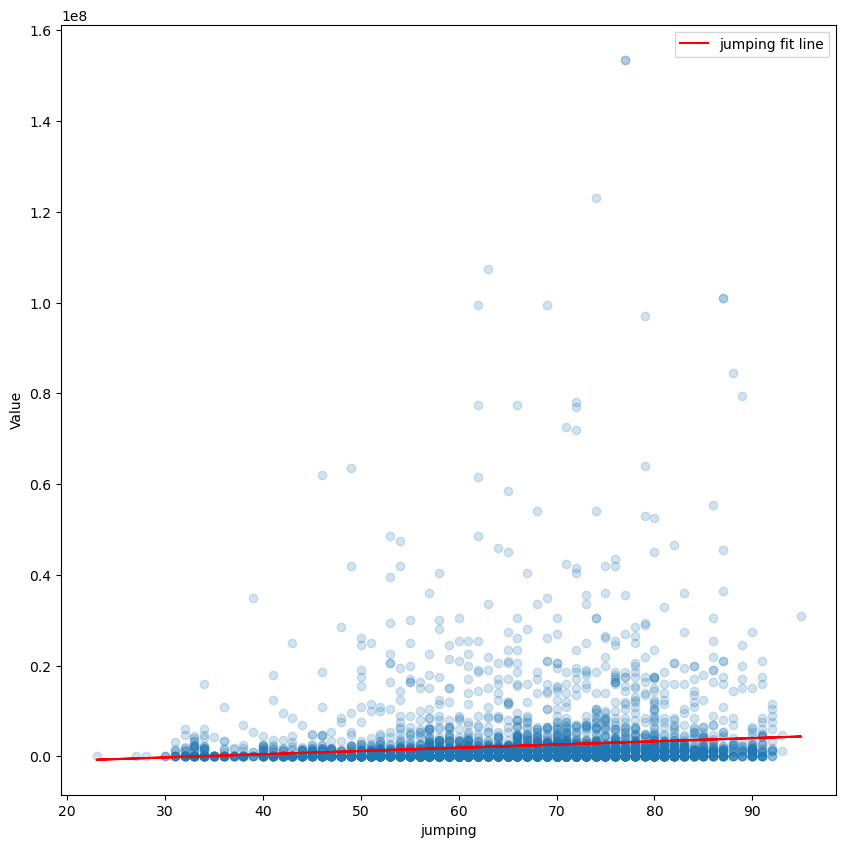

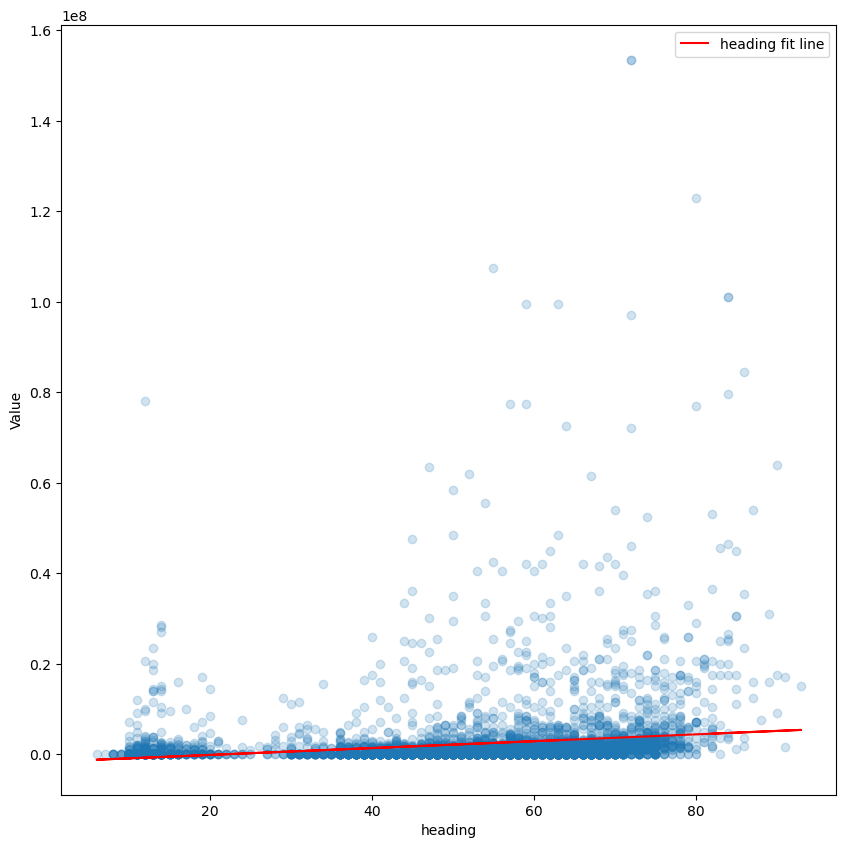

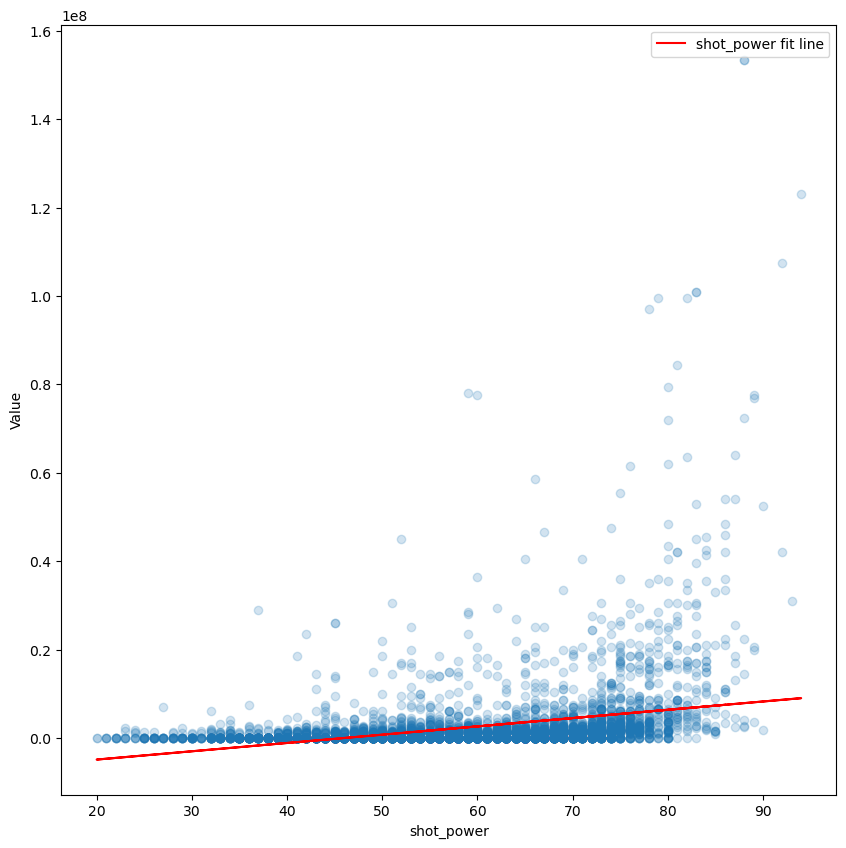

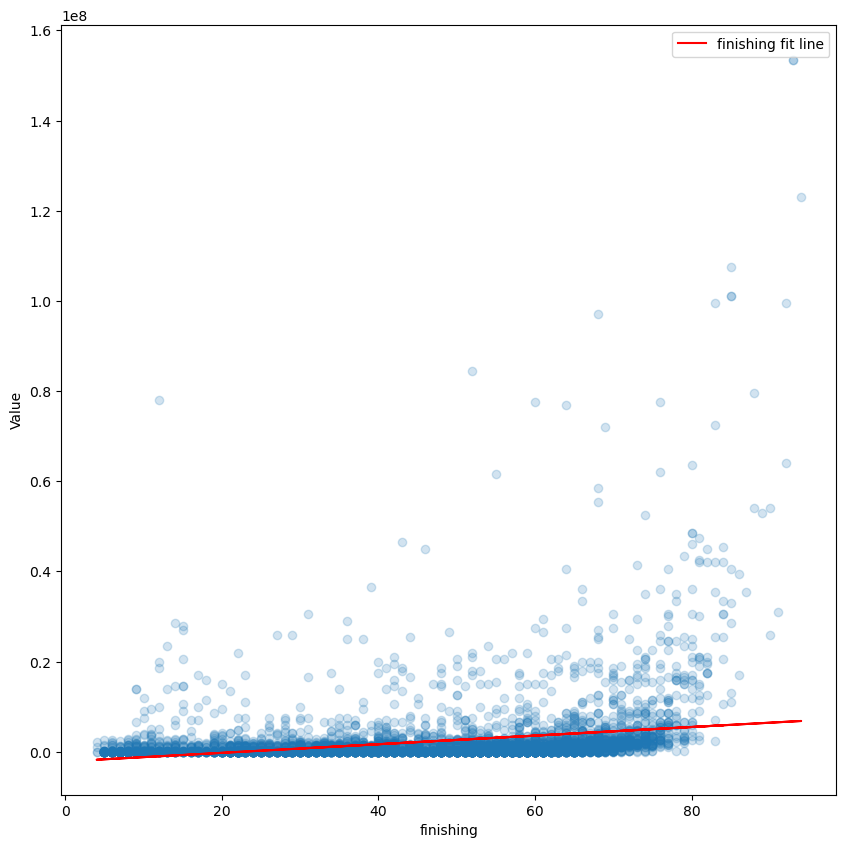

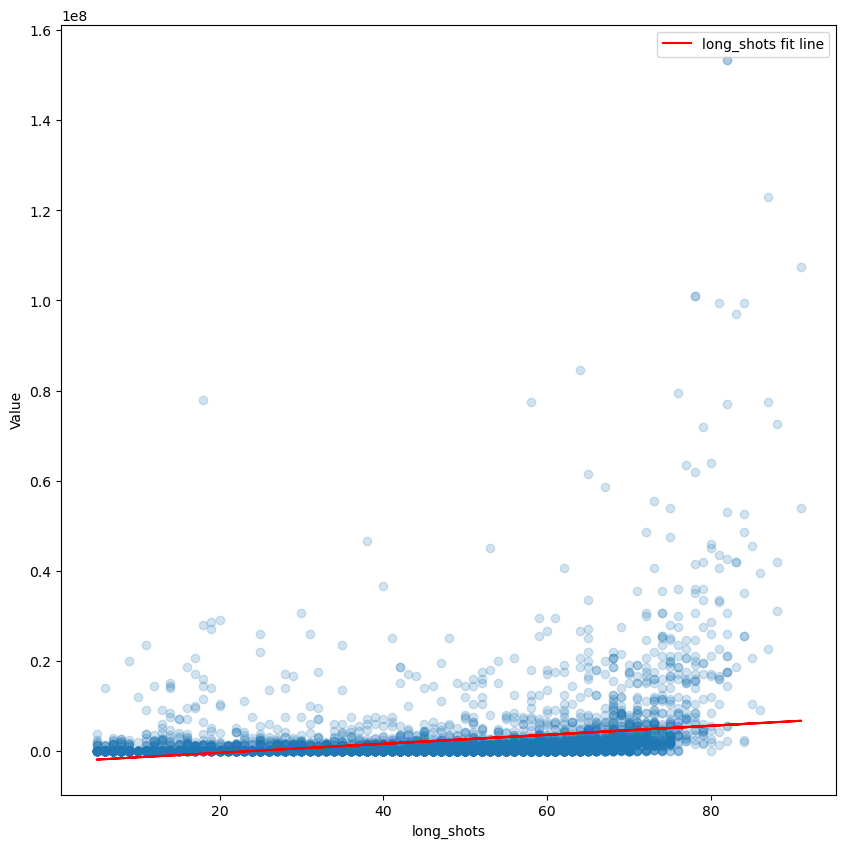

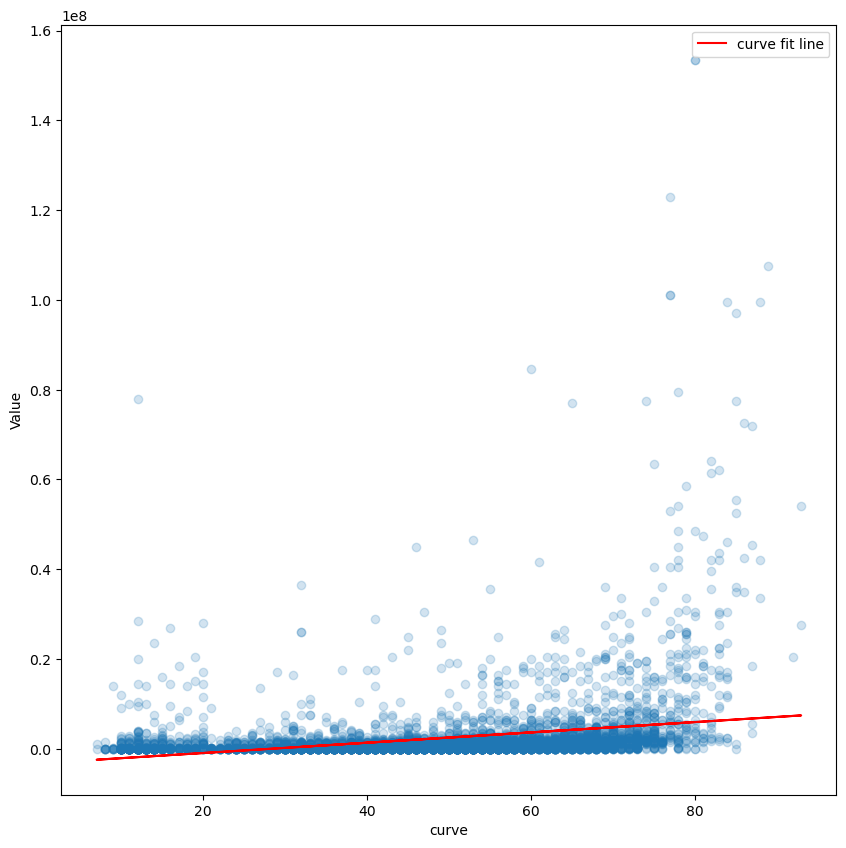

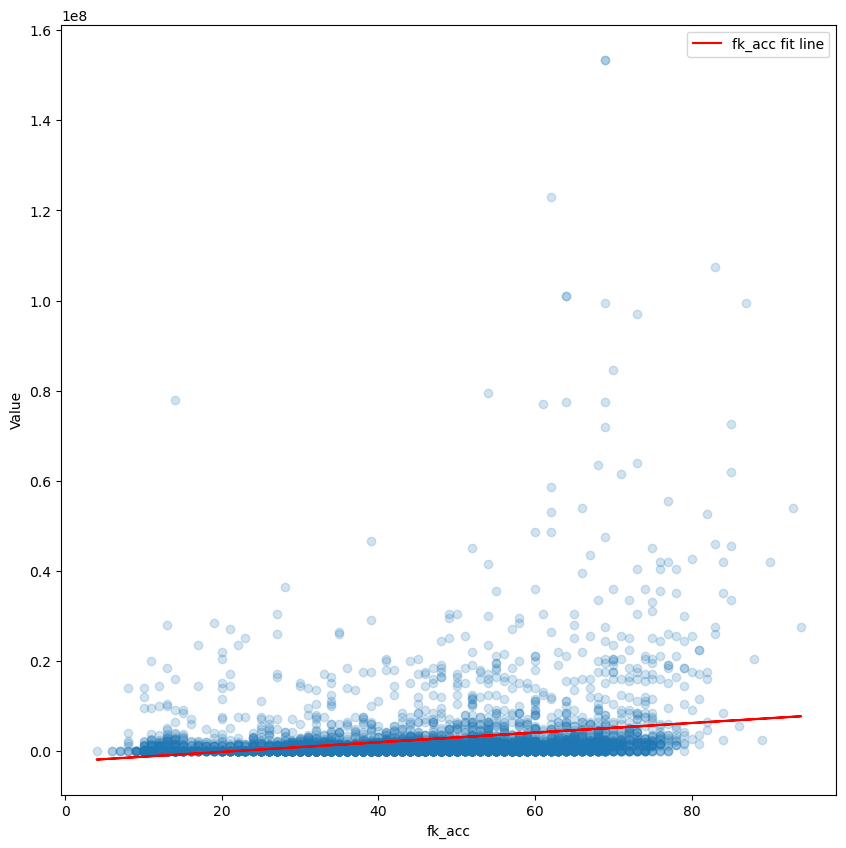

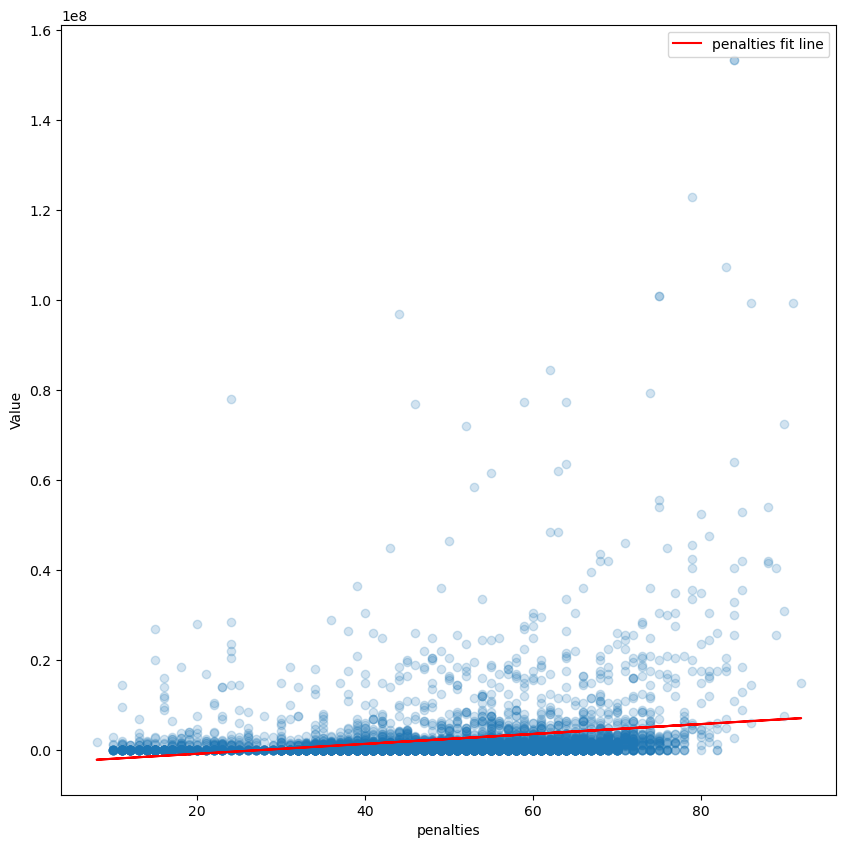

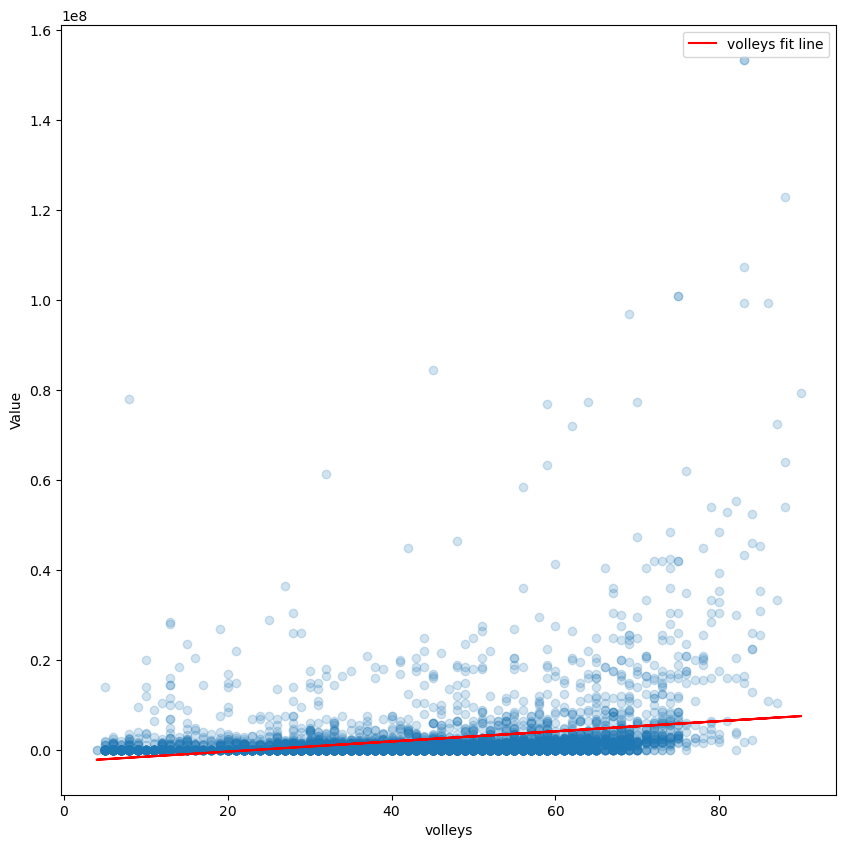

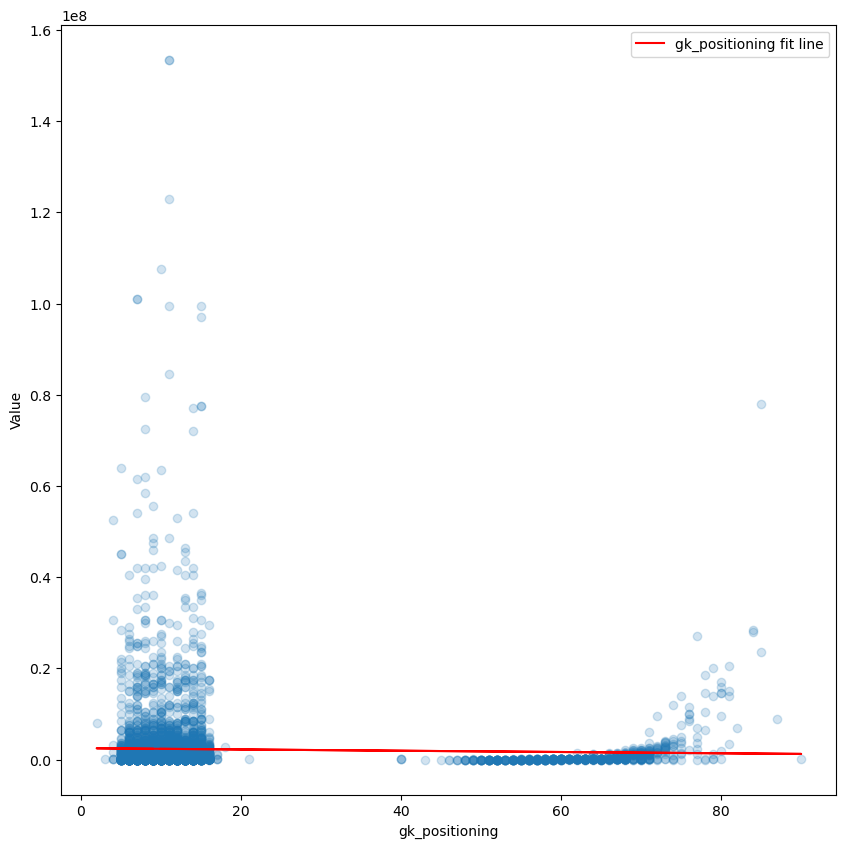

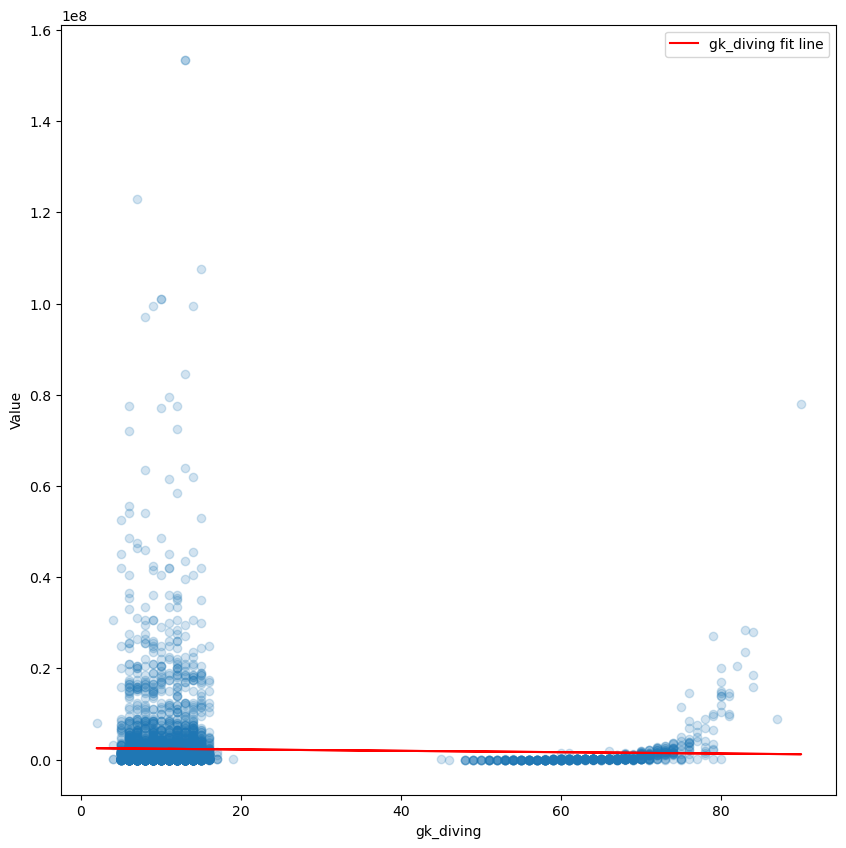

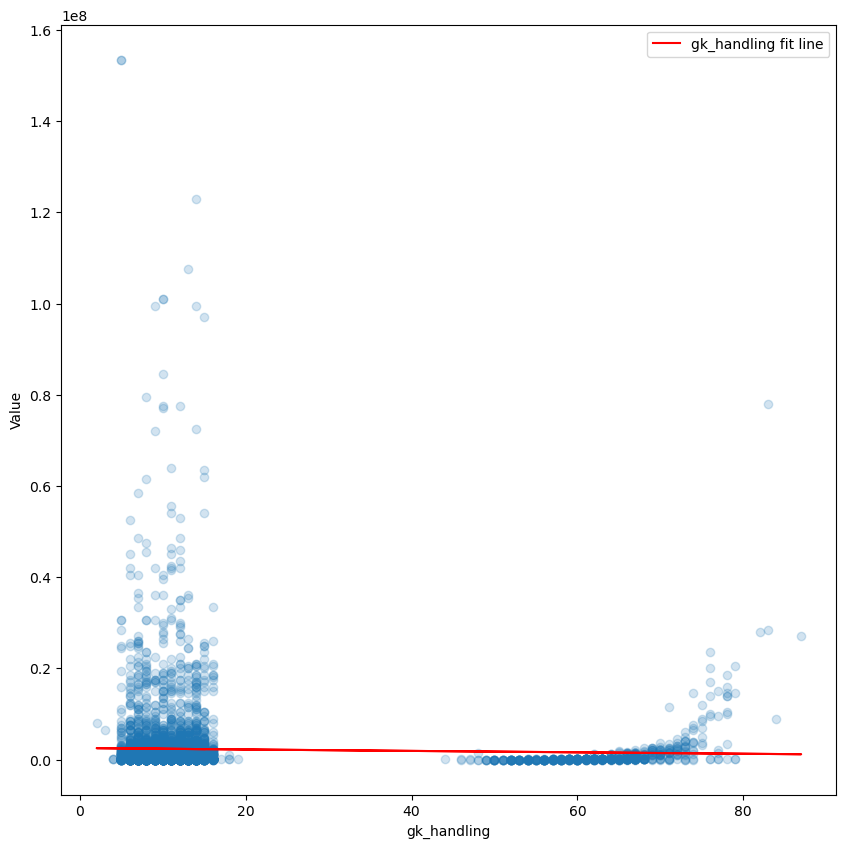

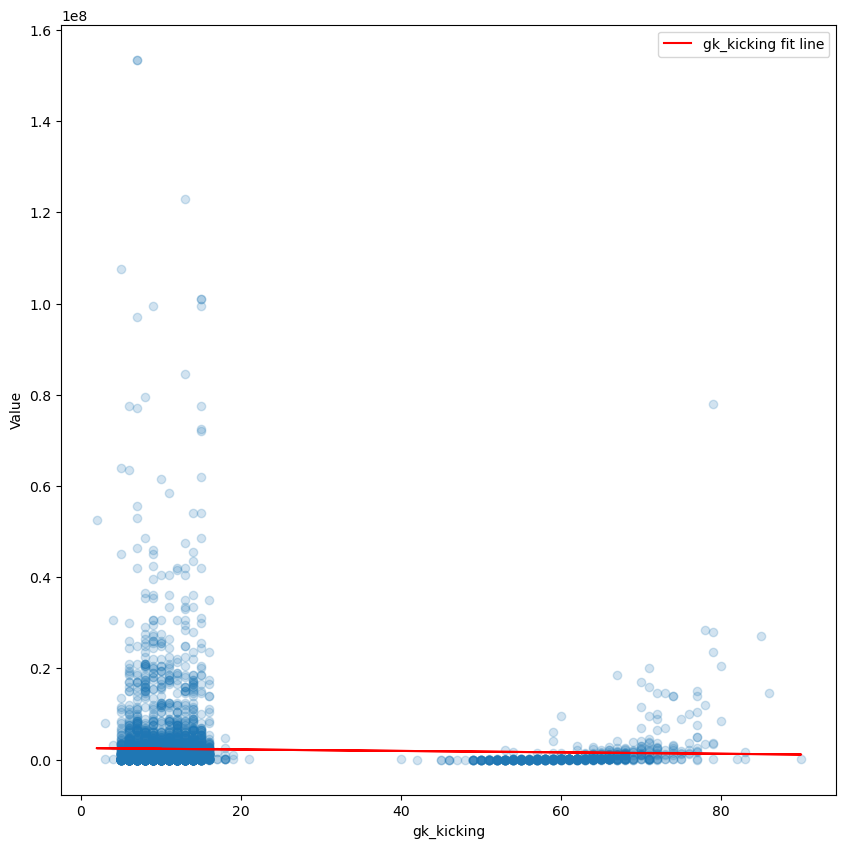

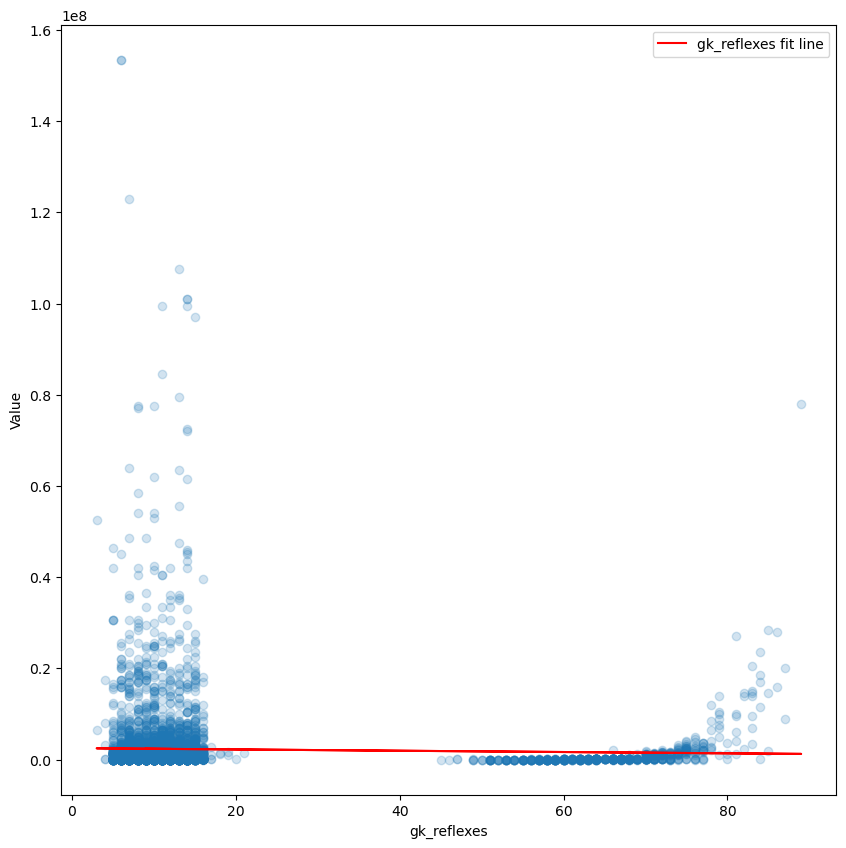

In [13]:
        # Ensure all columns in XInts and Y are numeric, converting non-numeric values to NaN
XInts = XInts.apply(pd.to_numeric, errors='coerce')
Y = pd.to_numeric(Y, errors='coerce')

# Drop rows with NaN values in XInts or Y
XInts = XInts.dropna()
Y = Y[XInts.index]  # Ensure Y matches the cleaned XInts

# Analyzing relationship with 'value' column (Y)
print(len(XInts.columns))
for c in XInts.columns:
    # Polynomial fitting with a degree of 1 (linear fit)
    a, b = np.polyfit(XInts[c], Y, 1)
    
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(XInts[c], Y, alpha=0.2)
    plt.plot(XInts[c], a * XInts[c] + b, color='red', label=f'{c} fit line')
    plt.xlabel(c)
    plt.ylabel("Value")
    plt.legend()
    plt.show()

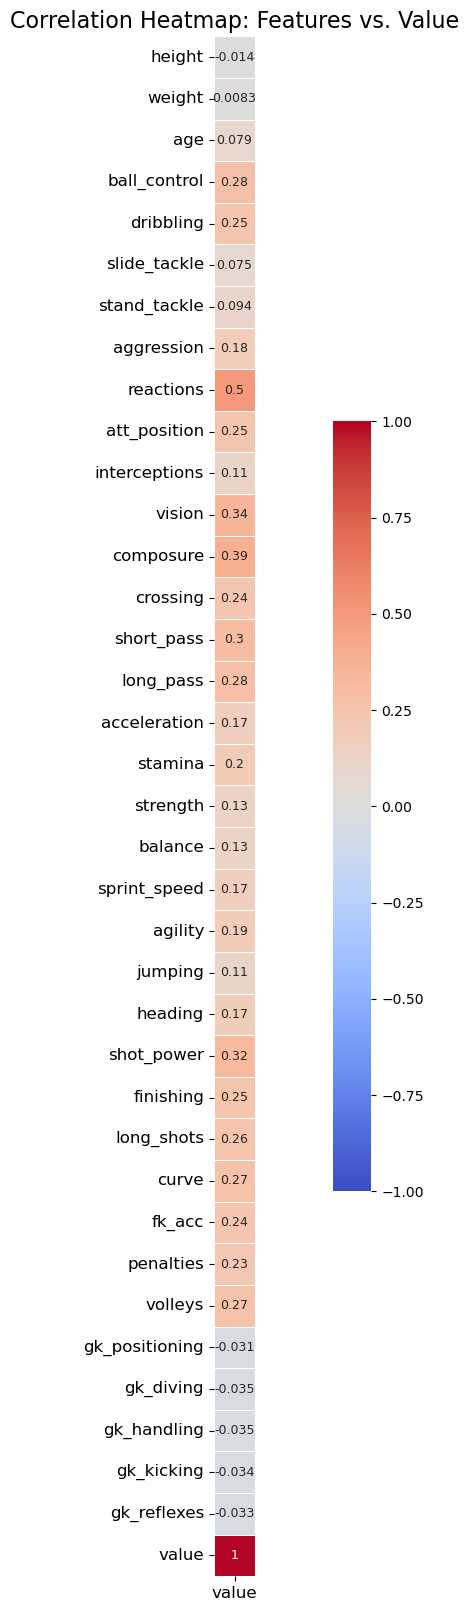

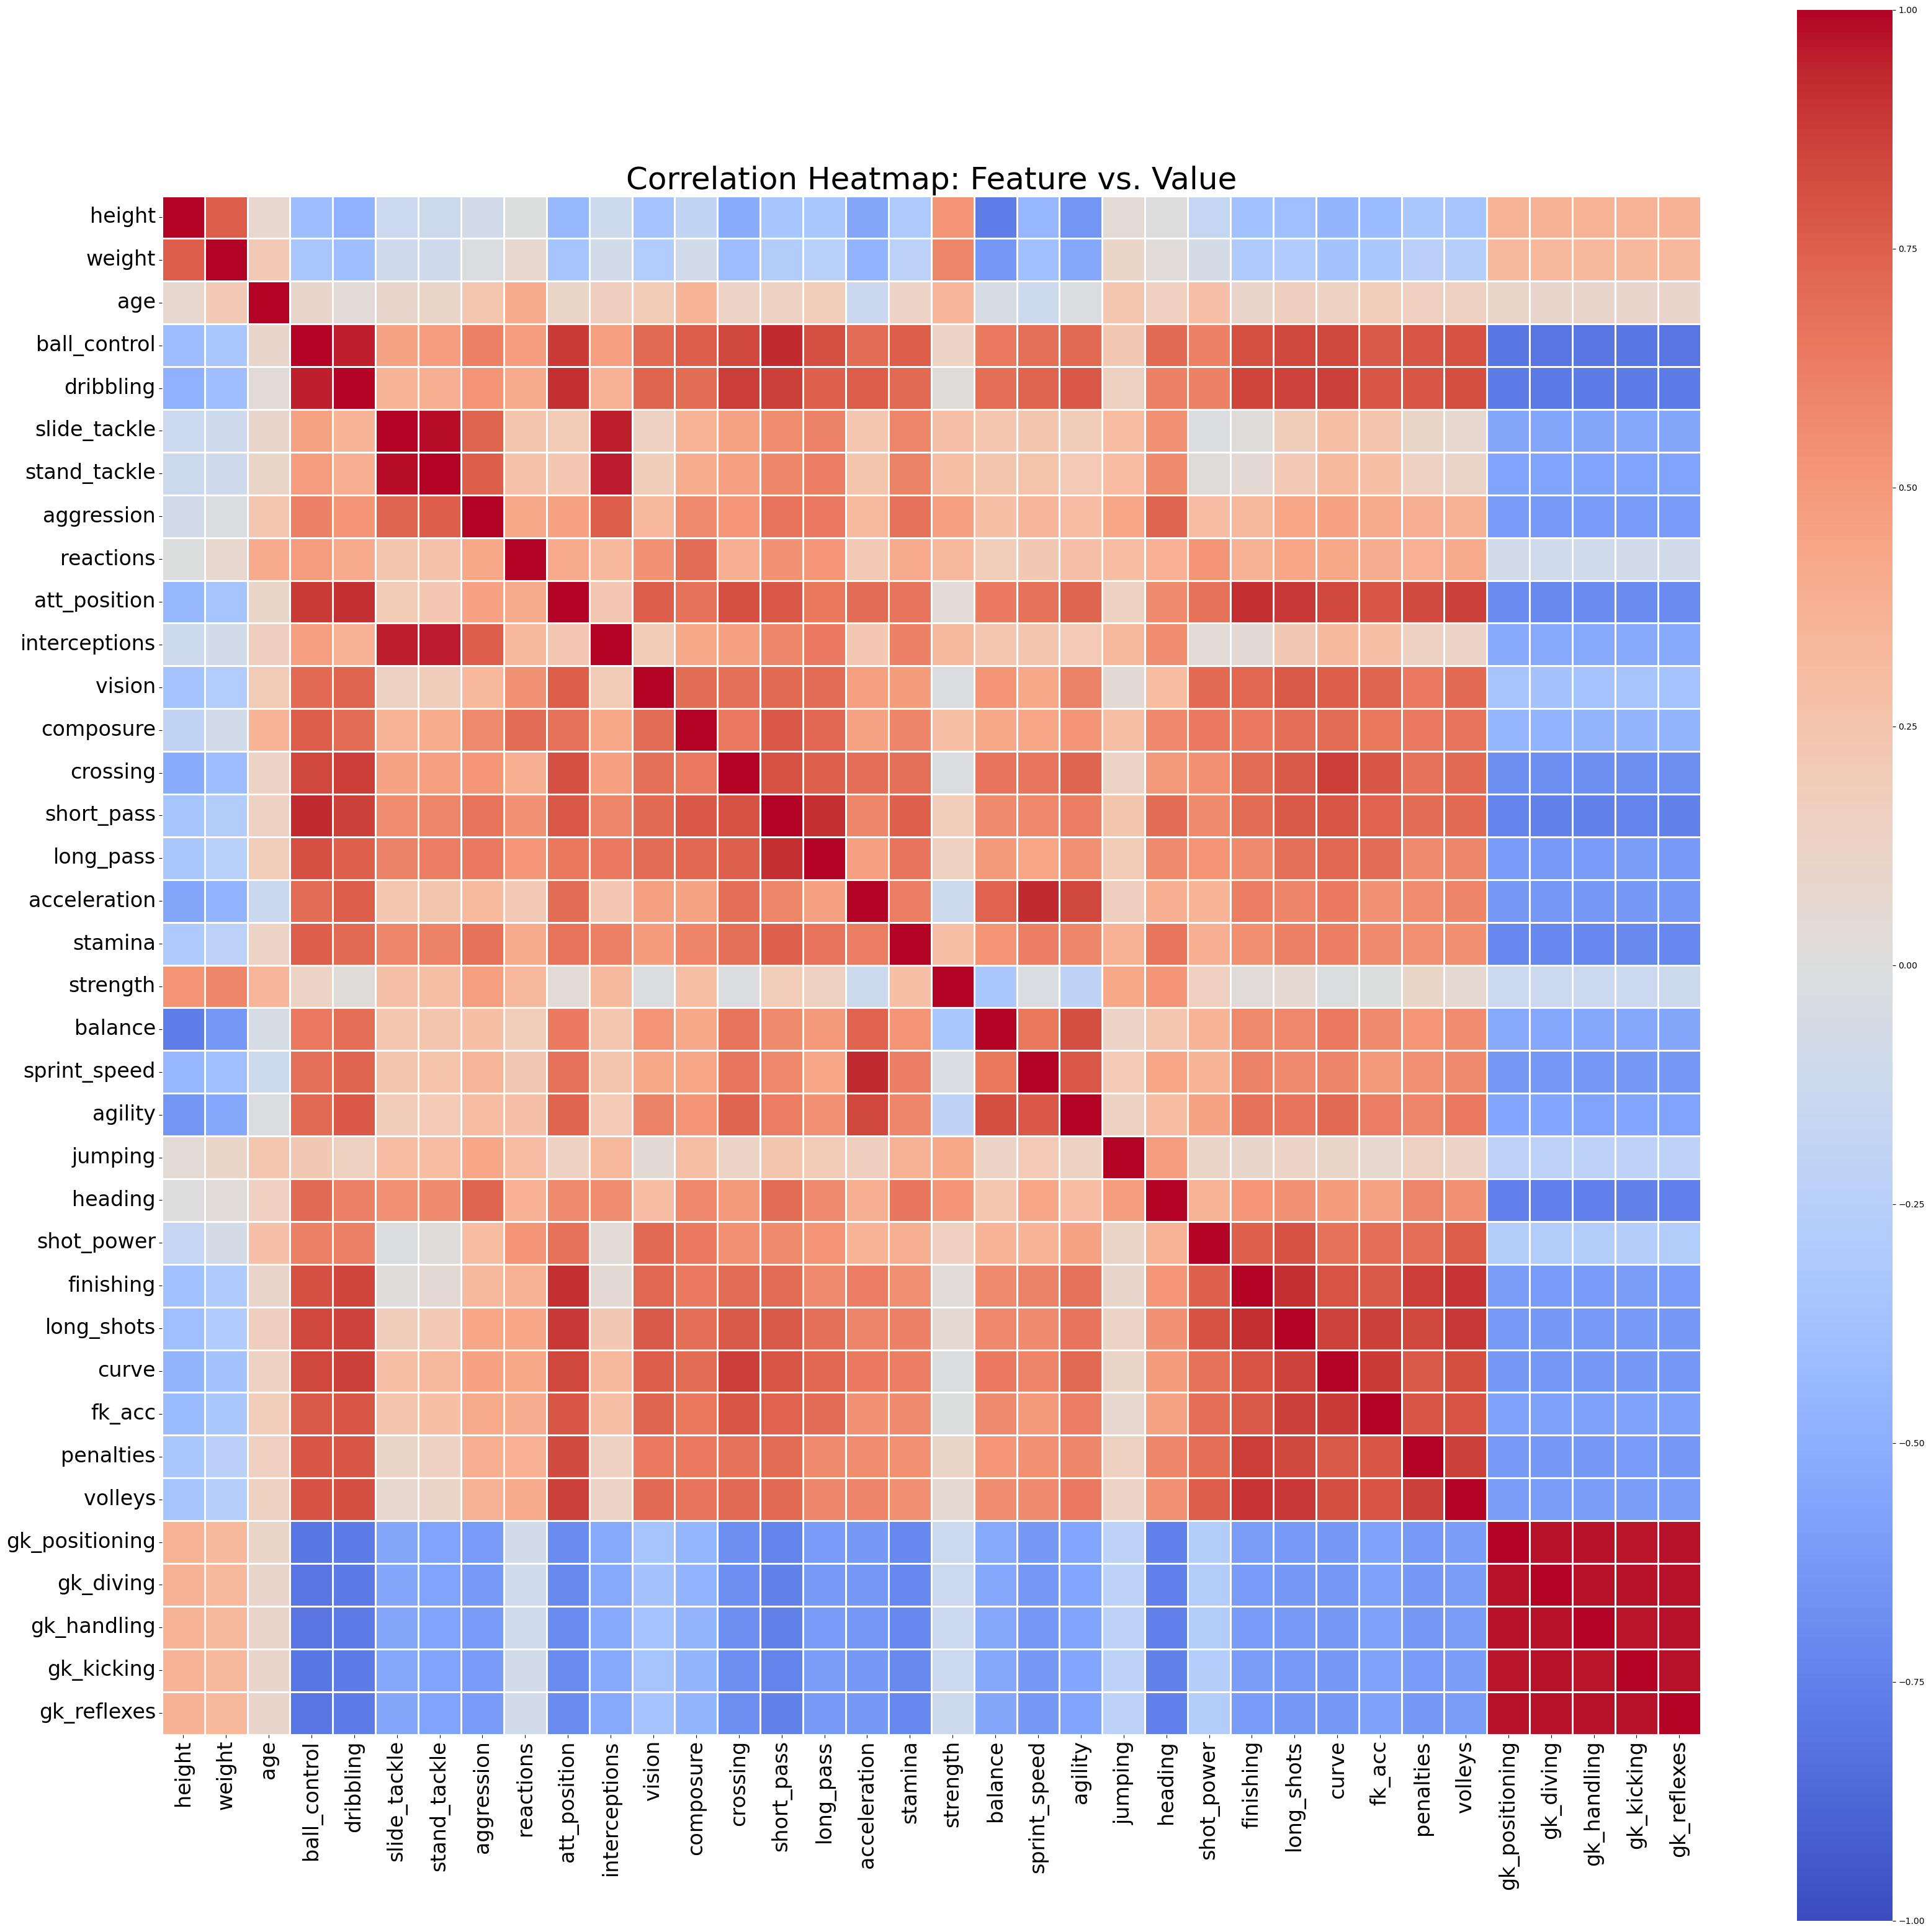

In [14]:
# Replace non-numeric characters and empty strings, then convert to float
df['value'] = (
    df['value']
    .astype(str)               # Ensure all values are strings
    .replace('[^\d.]', '', regex=True)  # Remove non-numeric characters except decimal points
    .replace('', np.nan)       # Replace empty strings with NaN
    .astype(float)             # Convert to float
)

# Drop rows where 'value' is NaN after cleaning
df = df.dropna(subset=['value'])

# Calculate correlation matrix against value
correlation_matrix_1 = df.drop(["country","club"], axis=1).corr().loc[df.drop(["country","club"],axis=1).columns, ['value']]

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 9})
plt.title('Correlation Heatmap: Features vs. Value', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate correlation matrix against every other feature
correlation_matrix_2 = XInts.corr()

# Create the first heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix_2, annot=False, cmap='coolwarm', vmin=-1, vmax=1, square=True,
            linewidths=1.0, cbar_kws={"shrink": 1}, annot_kws={"size": 12})
plt.title('Correlation Heatmap: Feature vs. Value', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

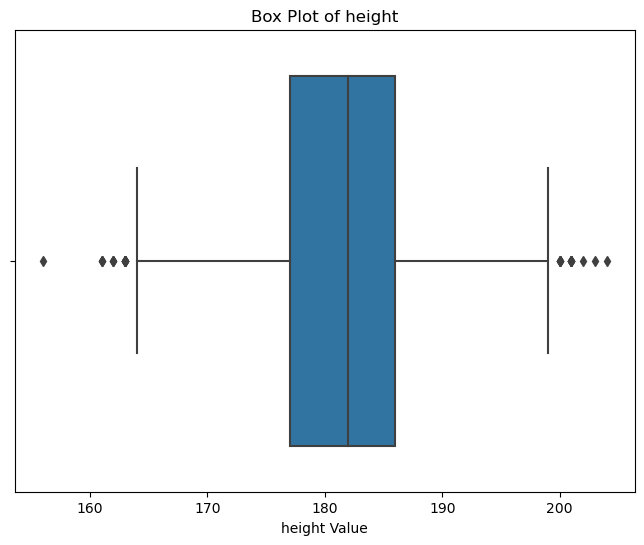

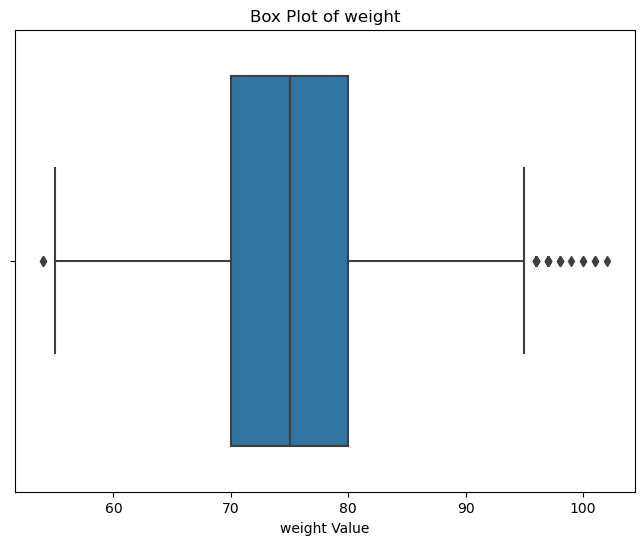

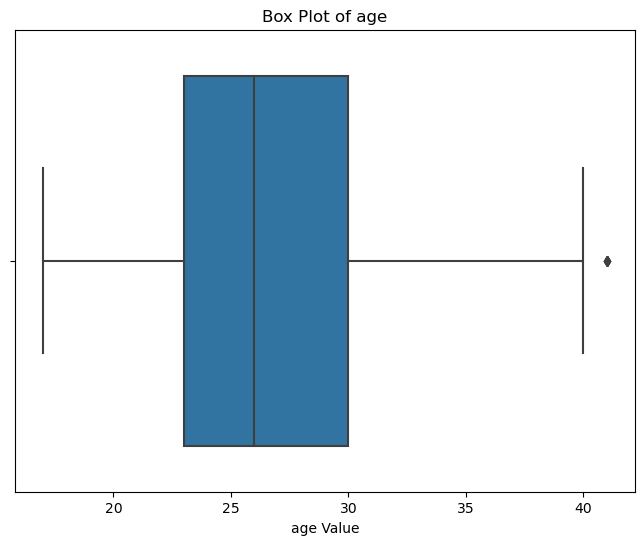

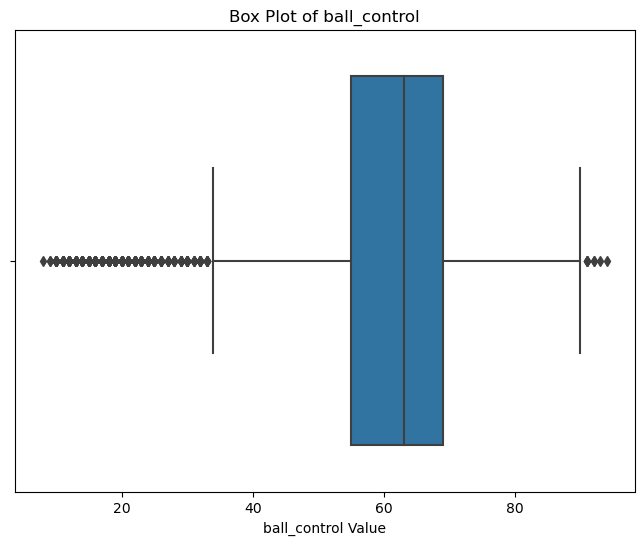

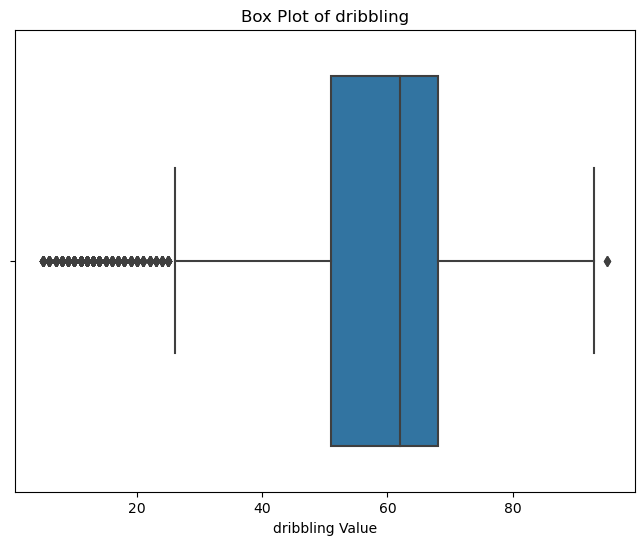

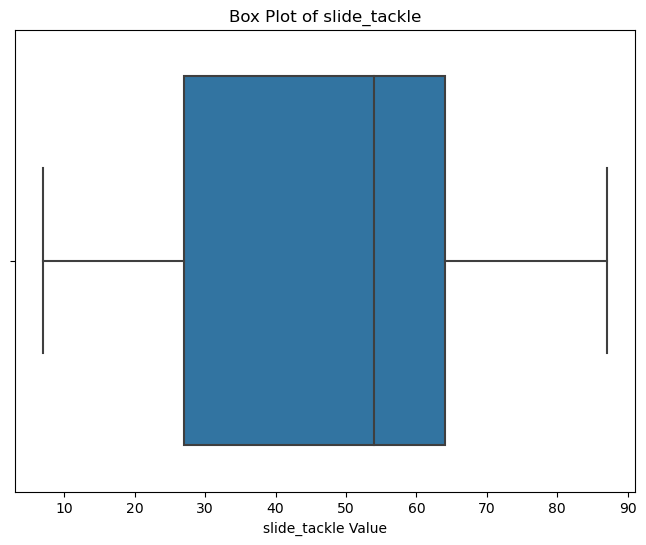

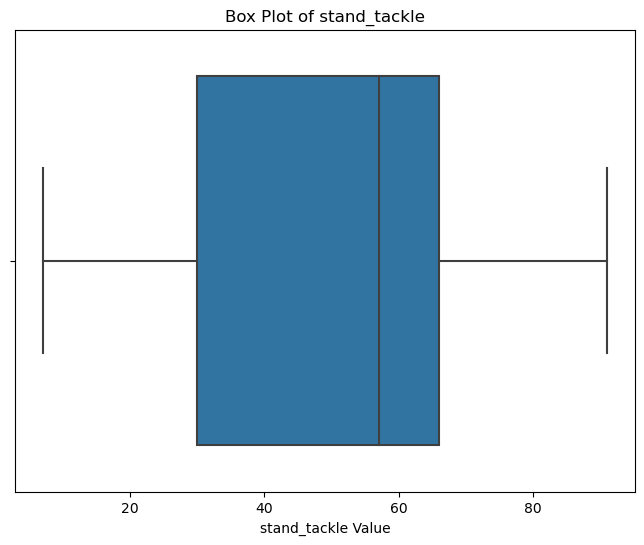

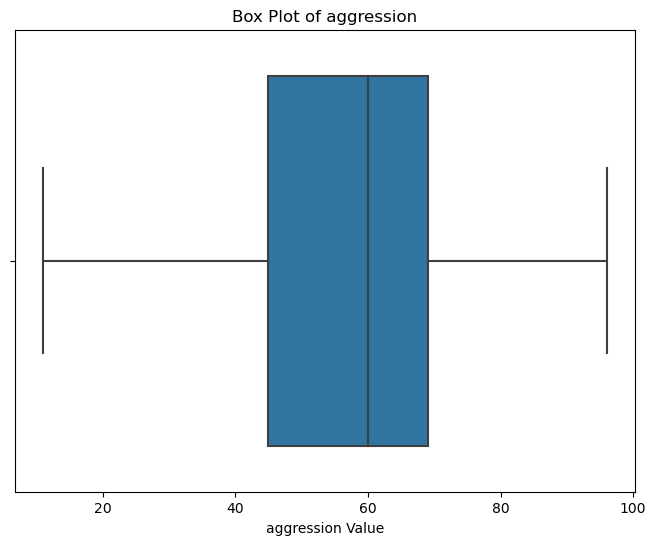

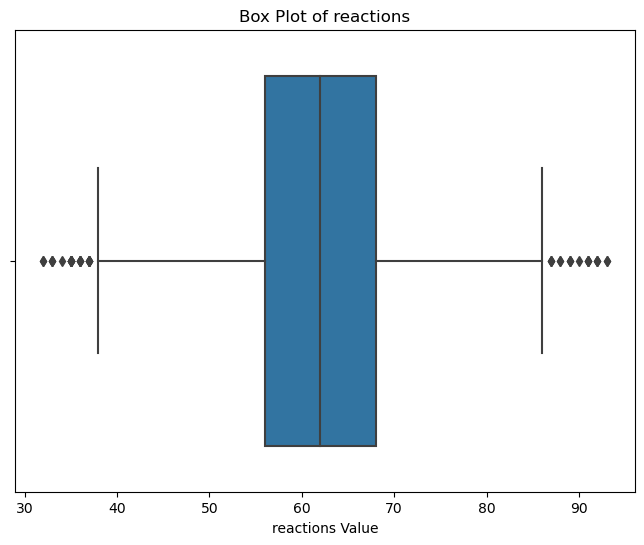

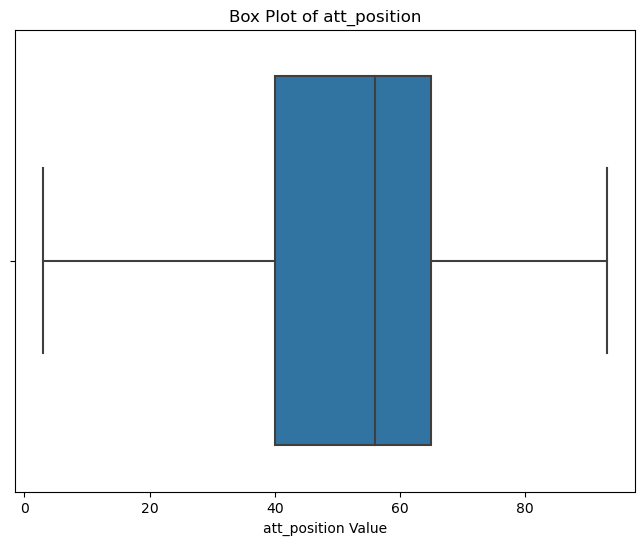

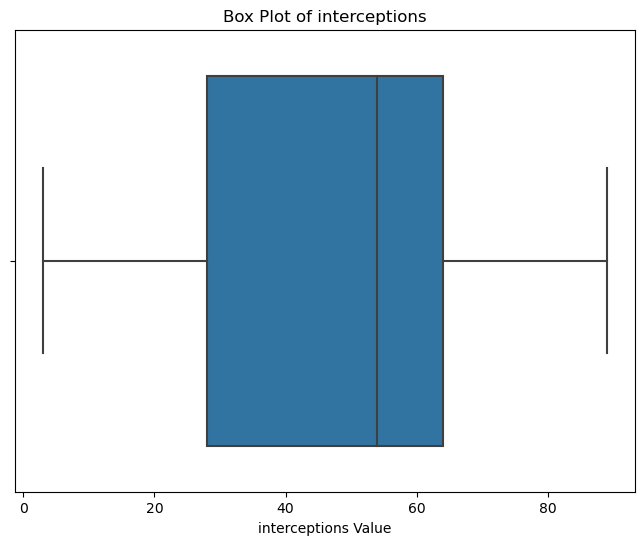

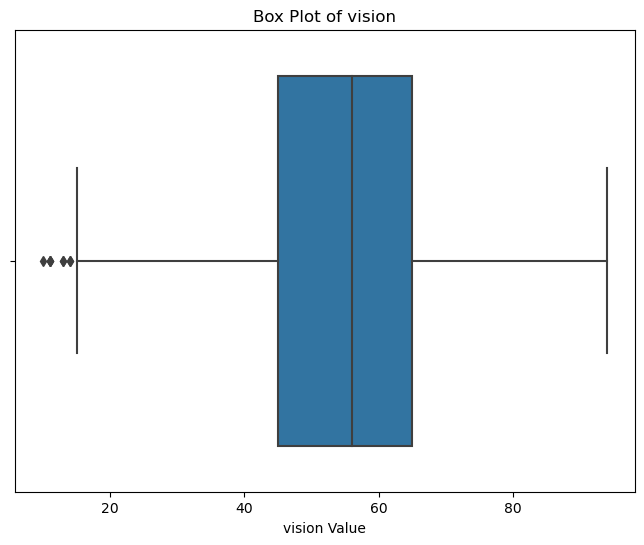

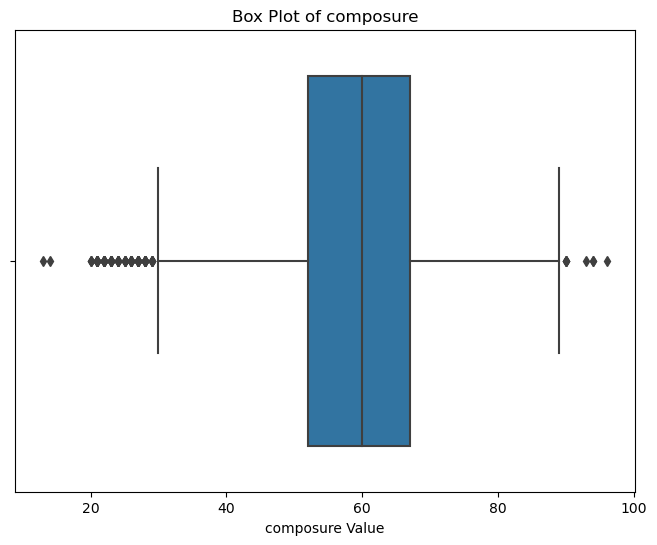

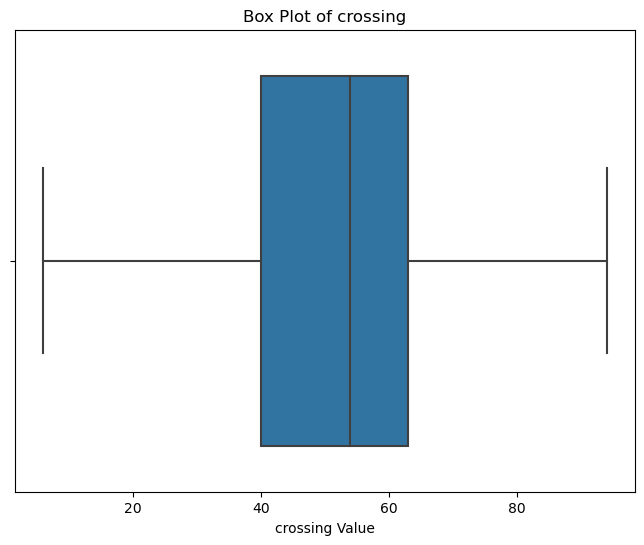

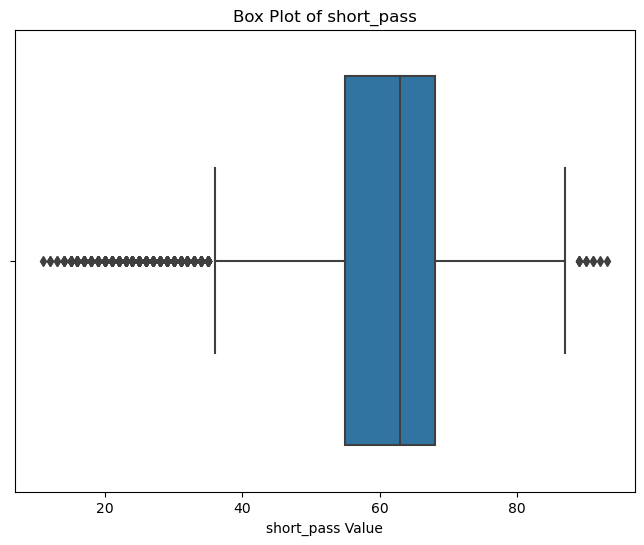

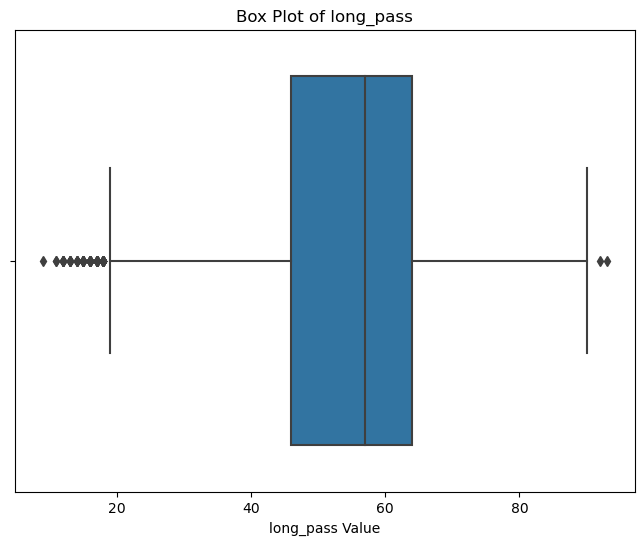

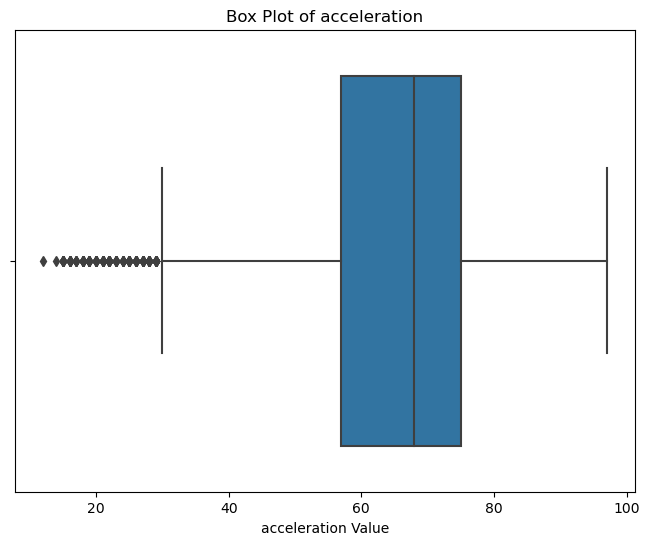

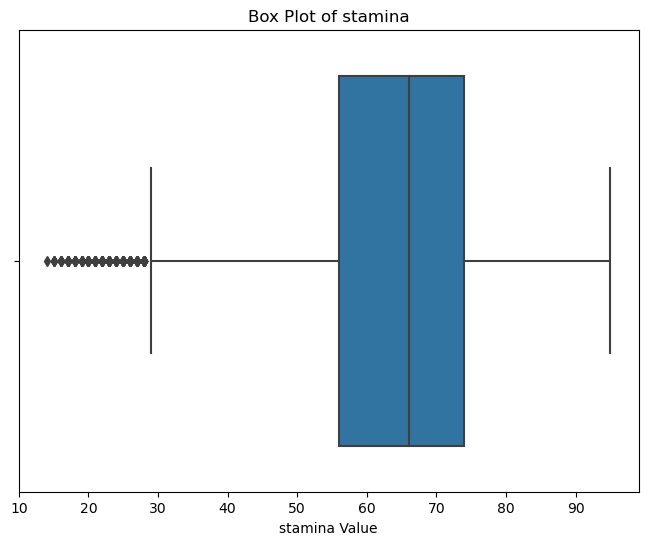

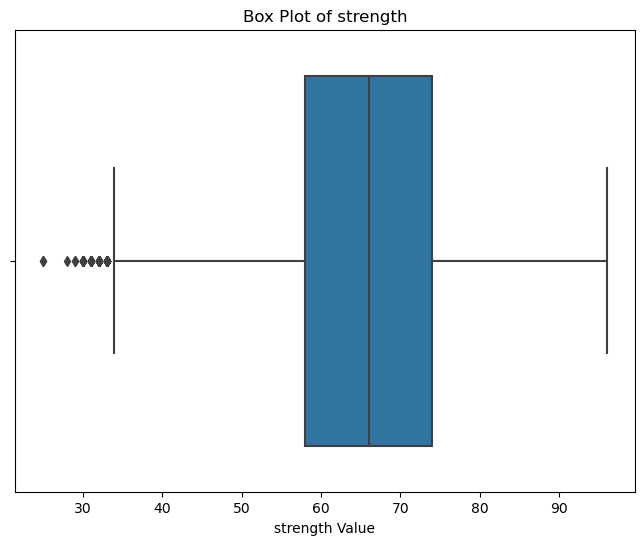

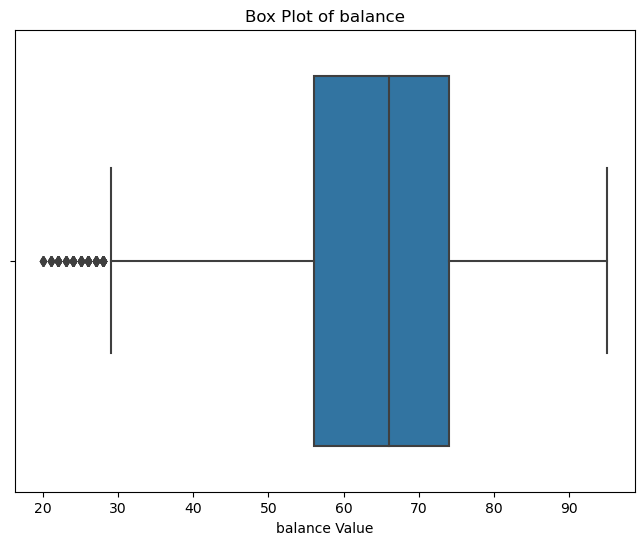

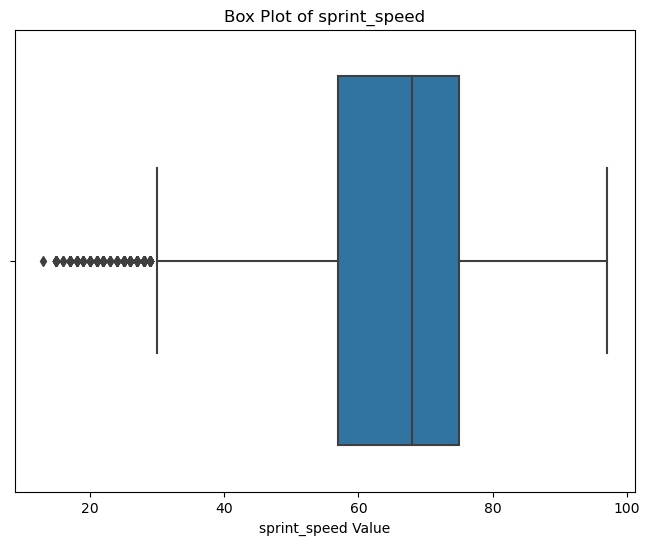

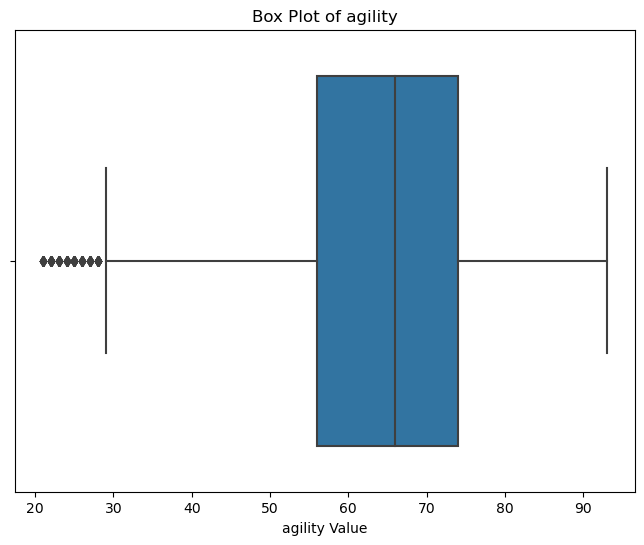

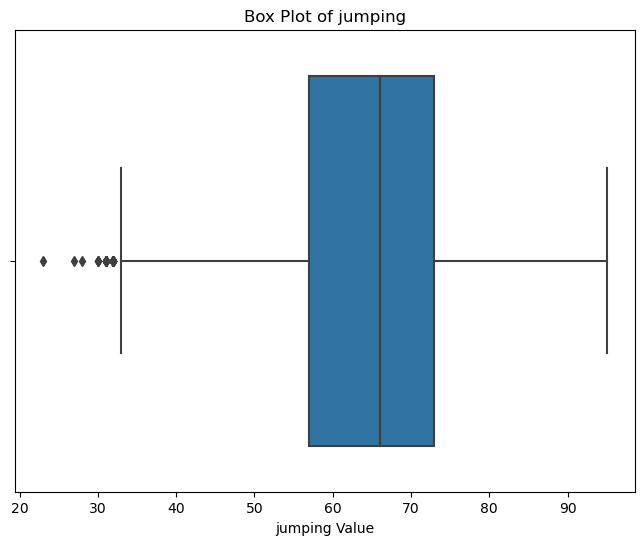

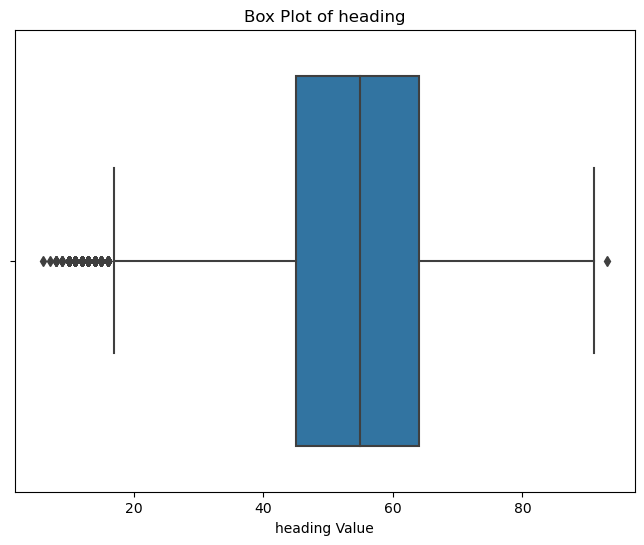

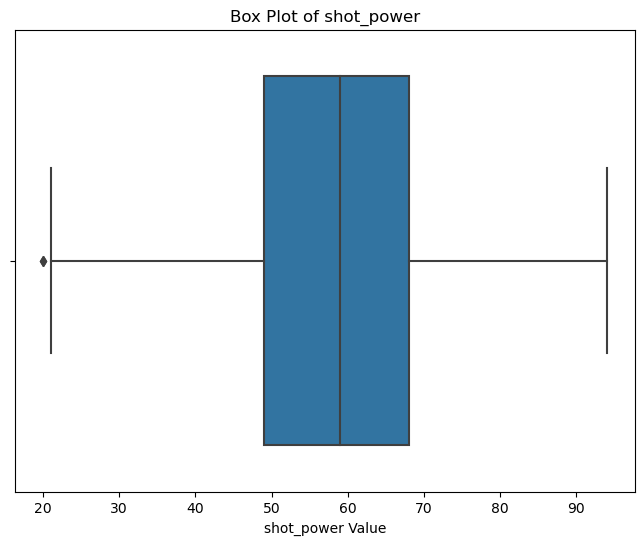

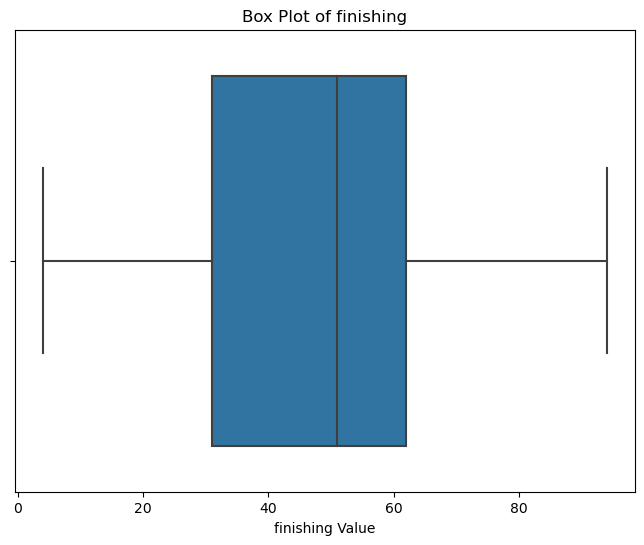

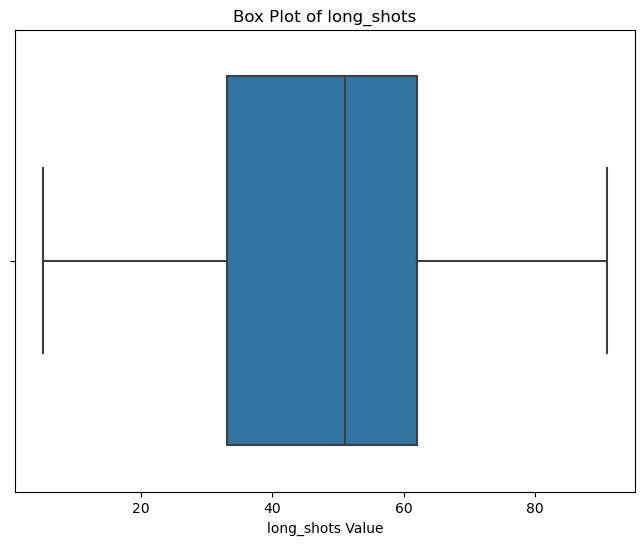

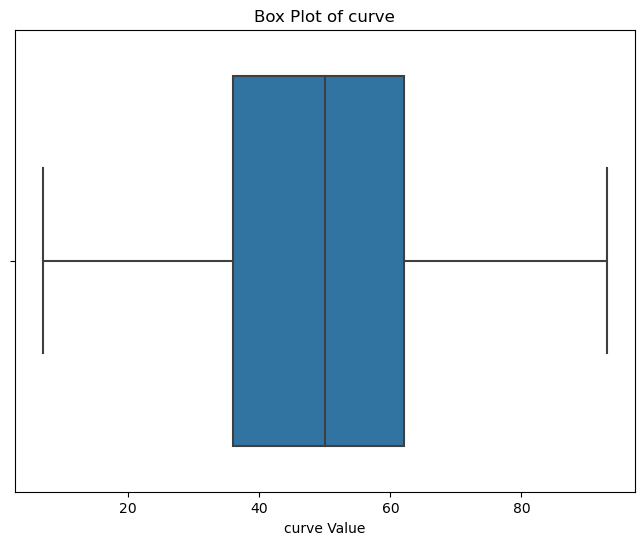

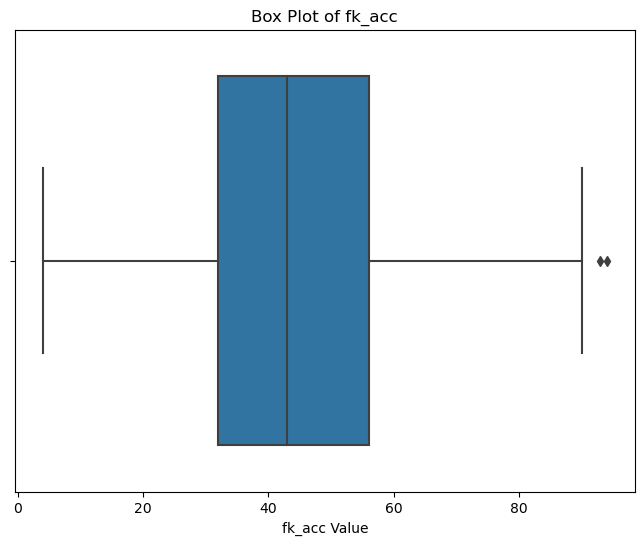

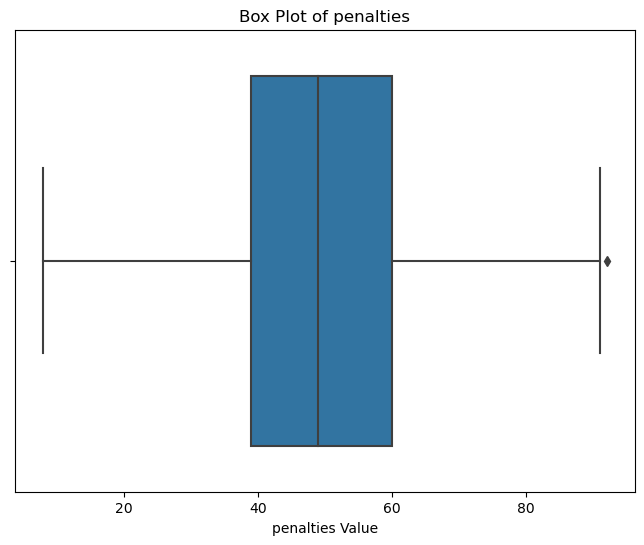

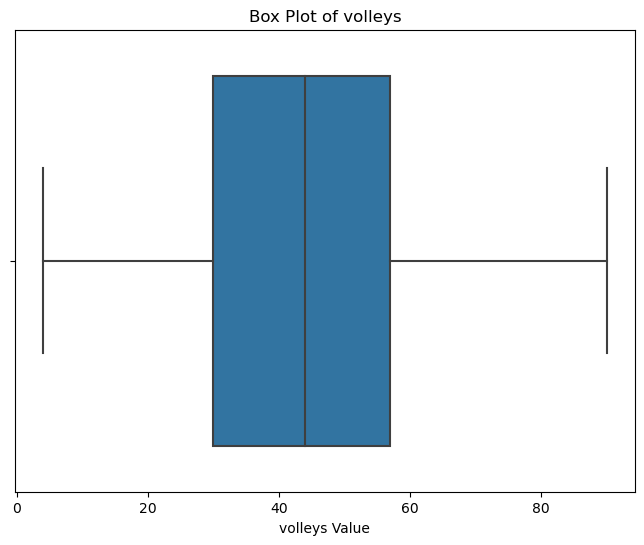

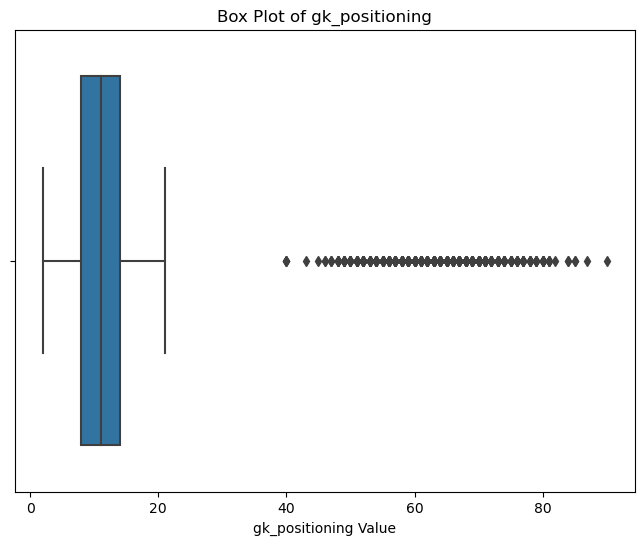

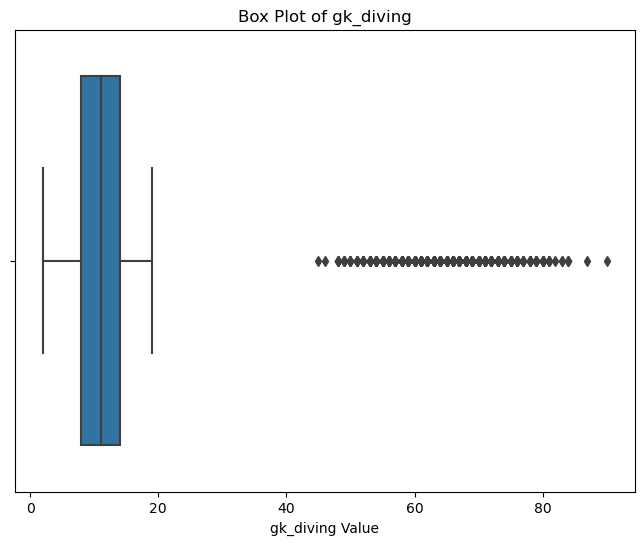

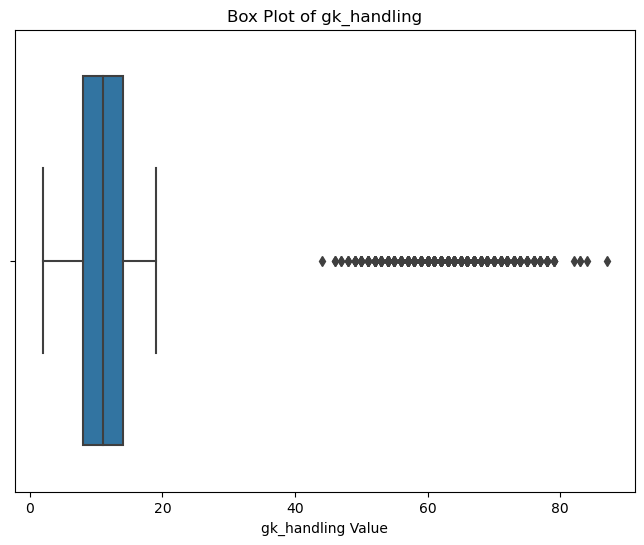

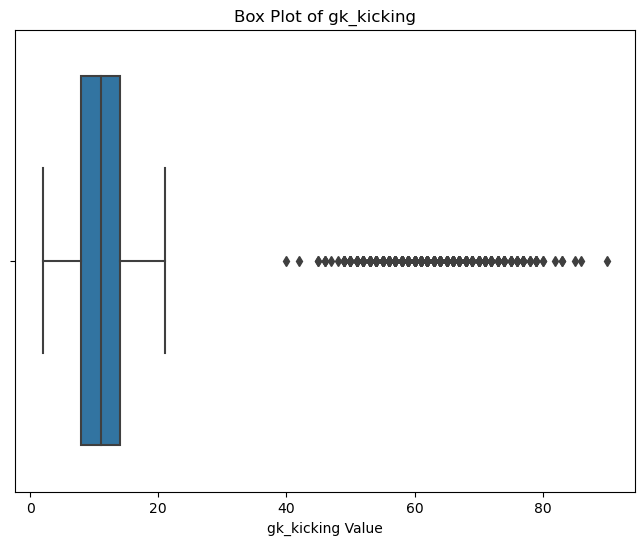

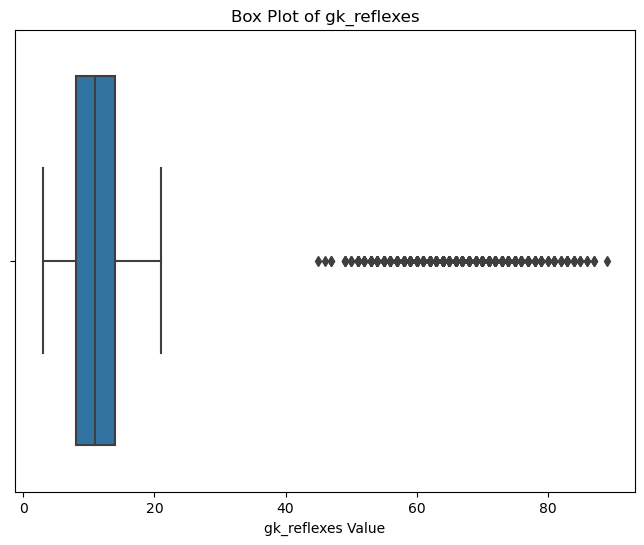

In [15]:
# Box Plots
for column in XInts.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=XInts[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(f'{column} Value')
    plt.show()

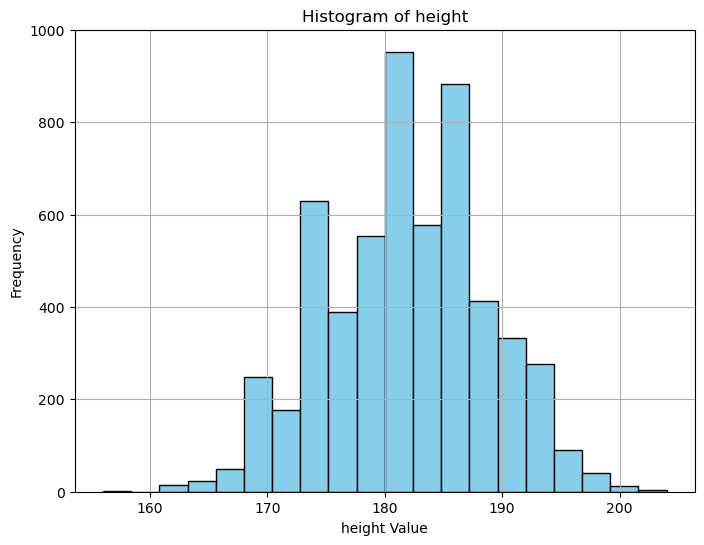

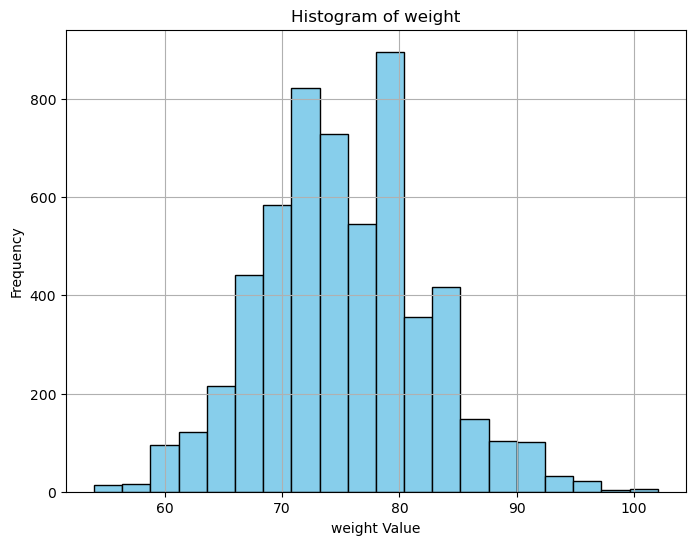

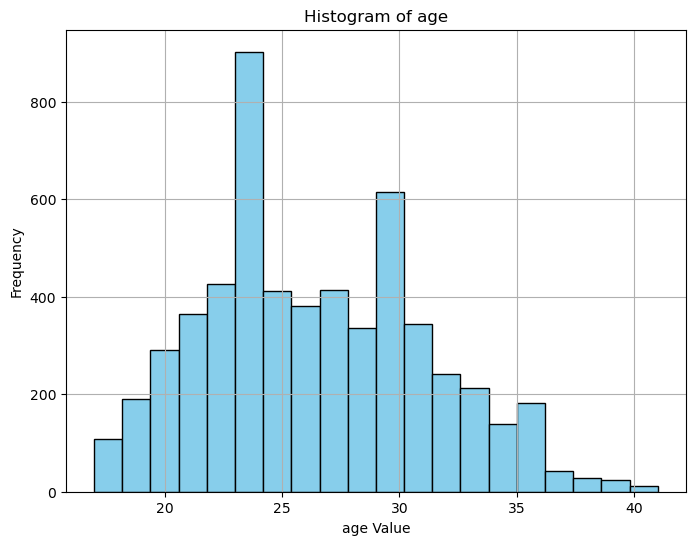

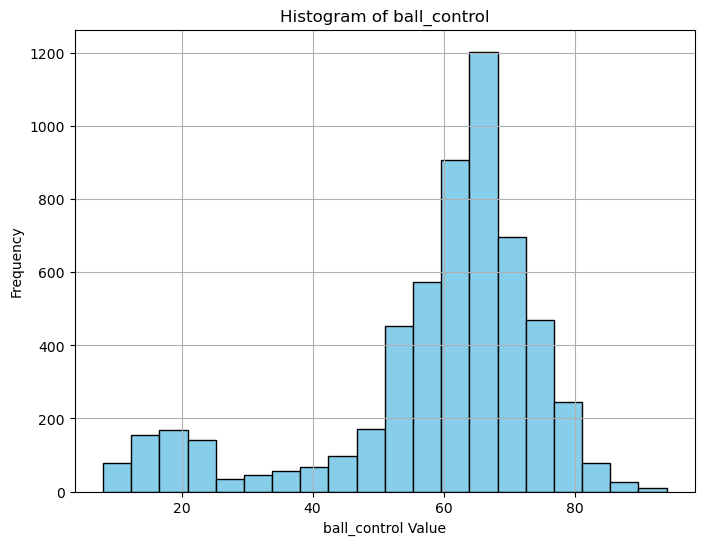

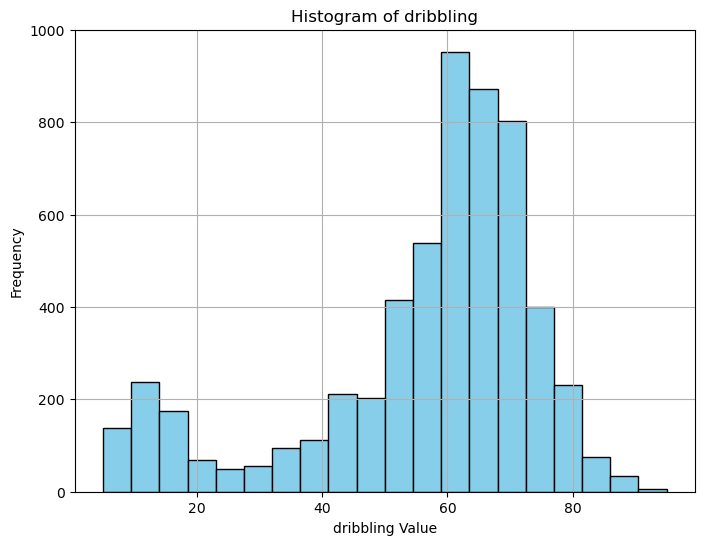

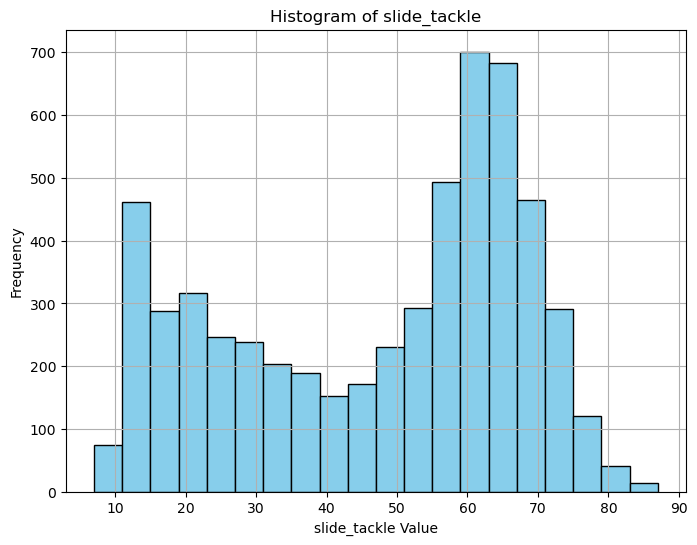

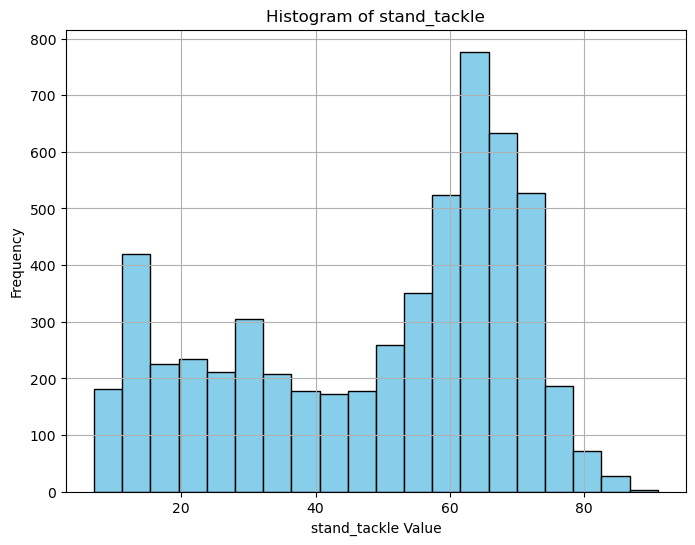

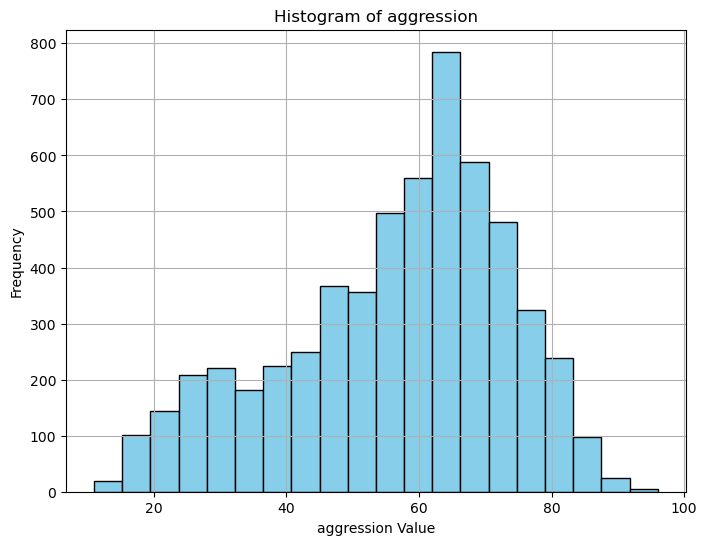

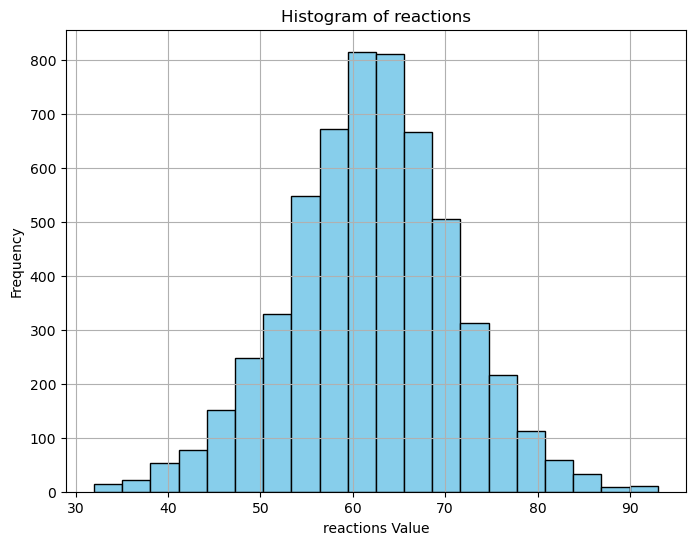

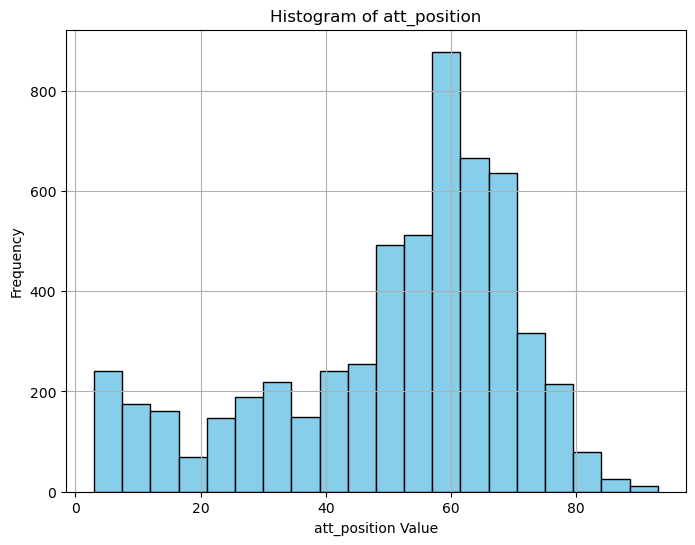

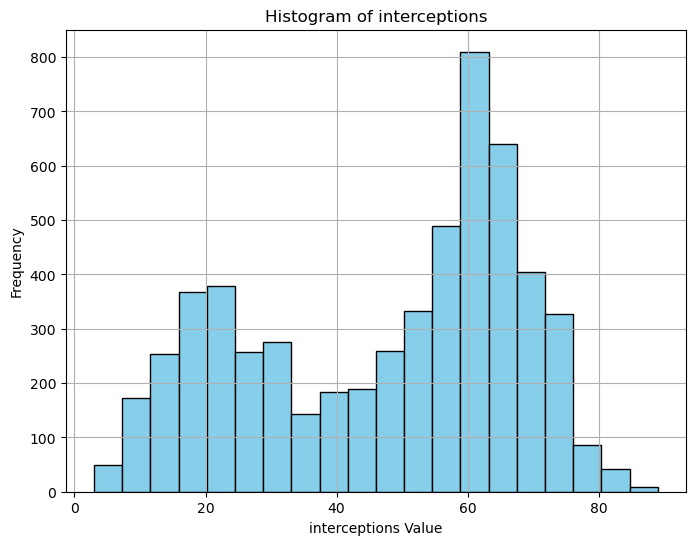

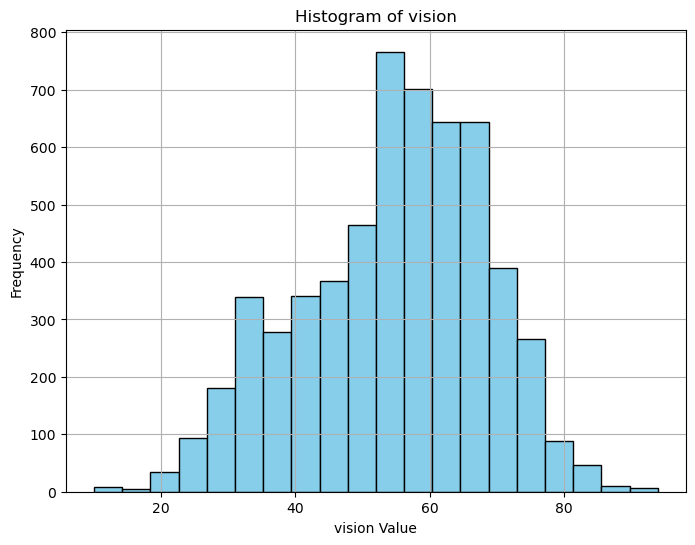

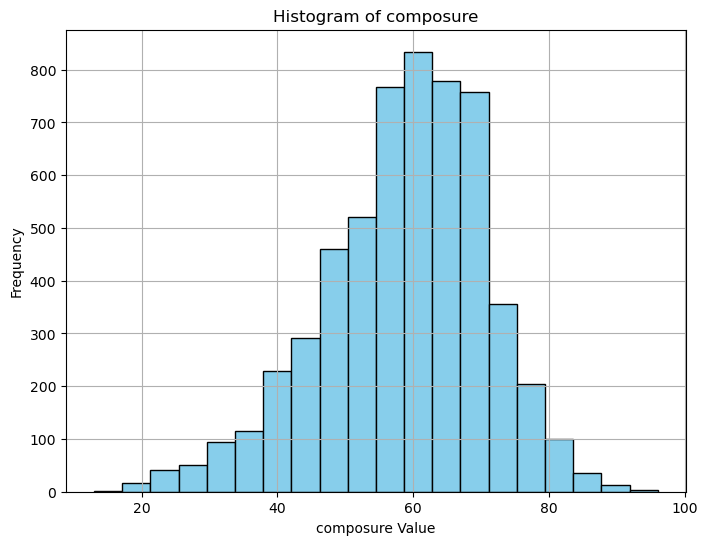

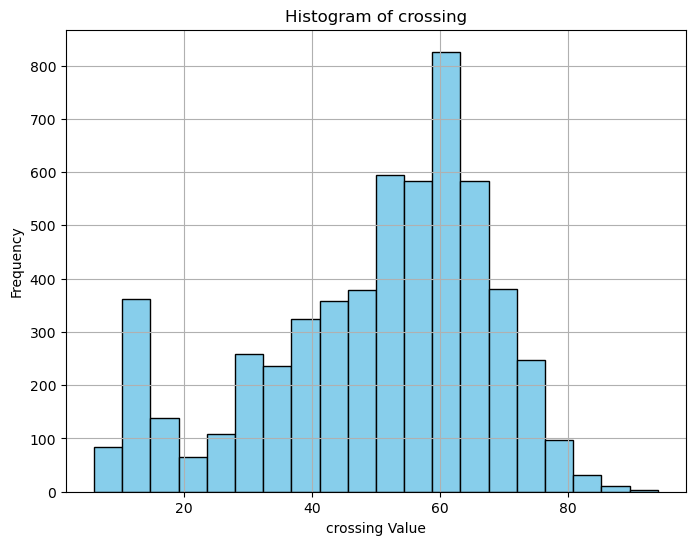

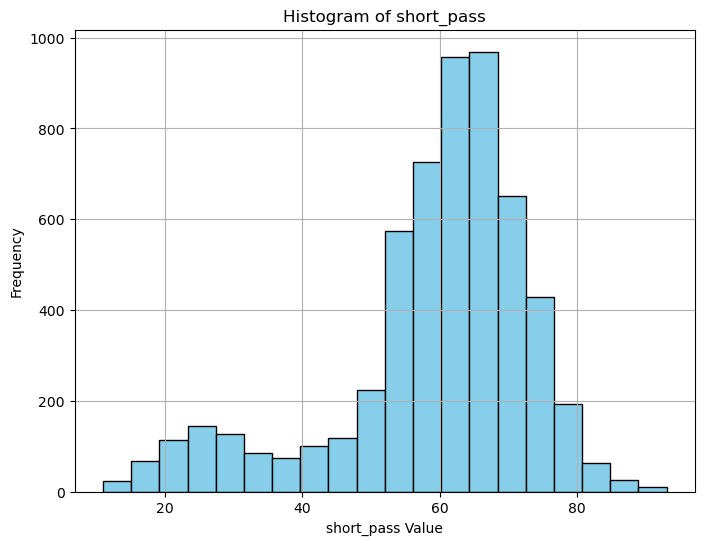

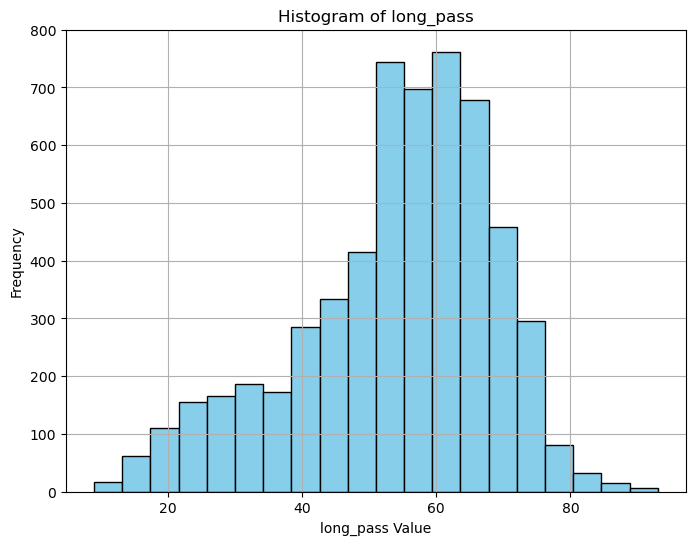

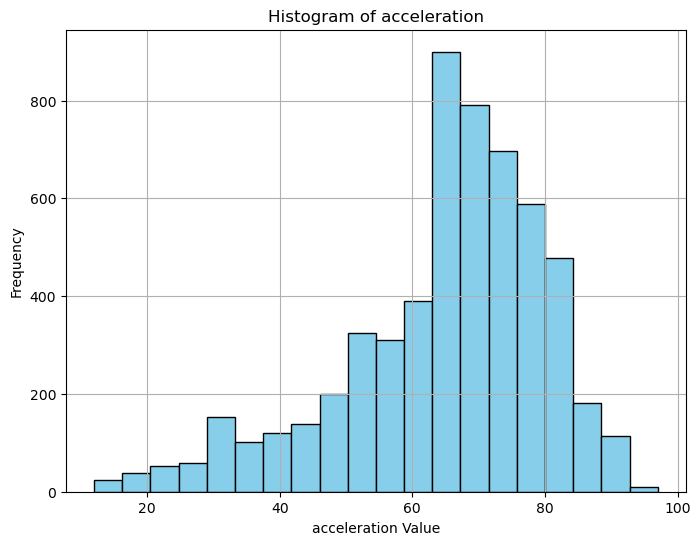

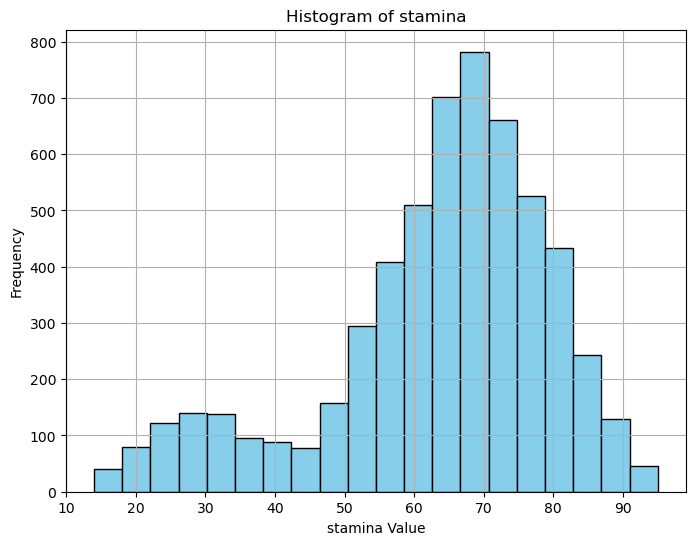

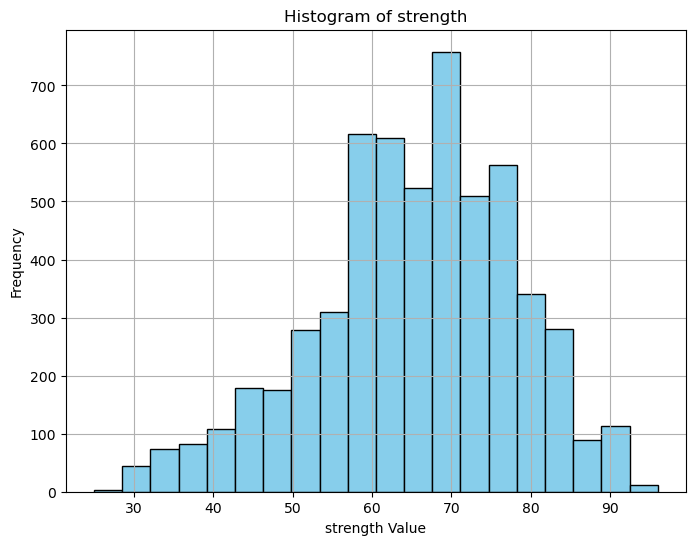

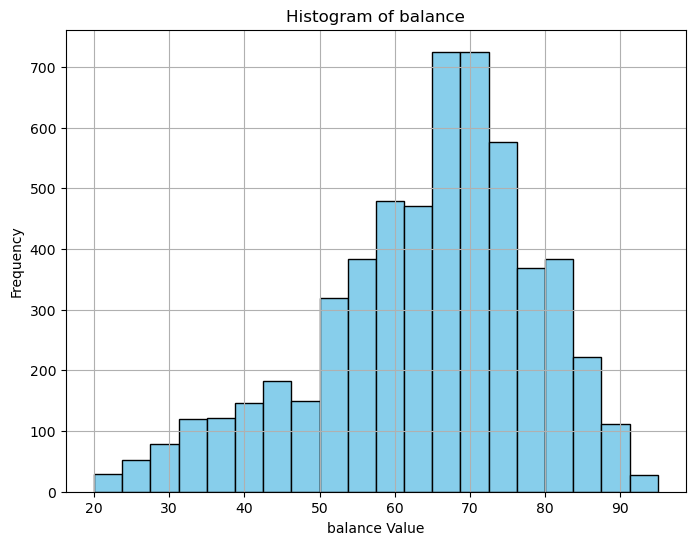

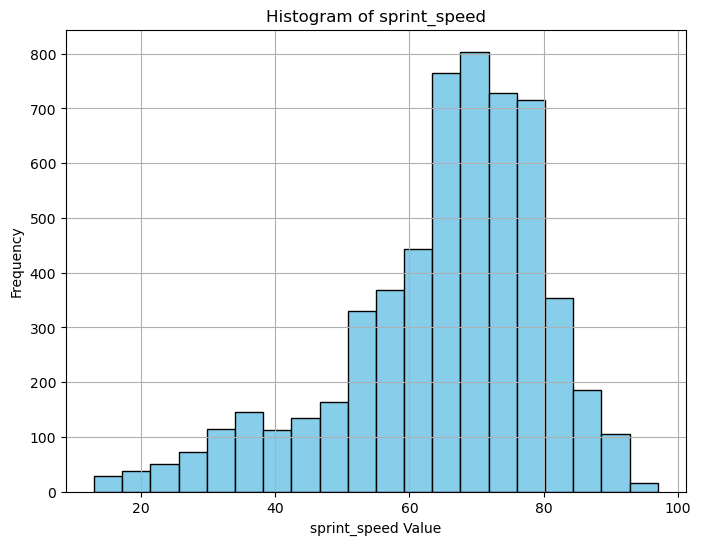

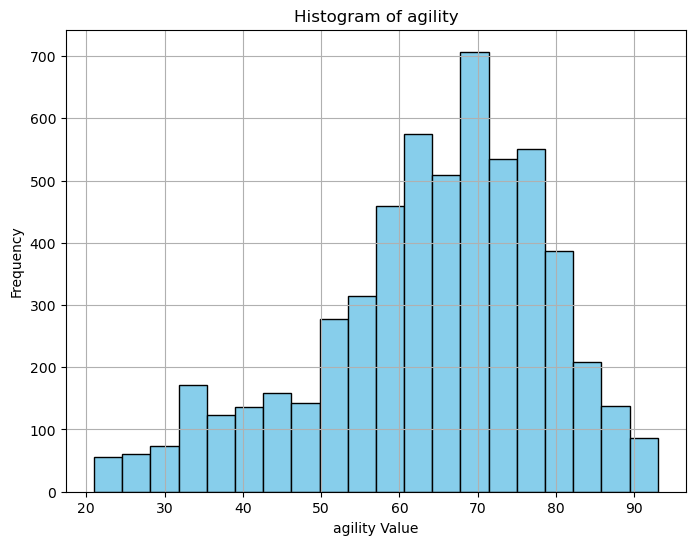

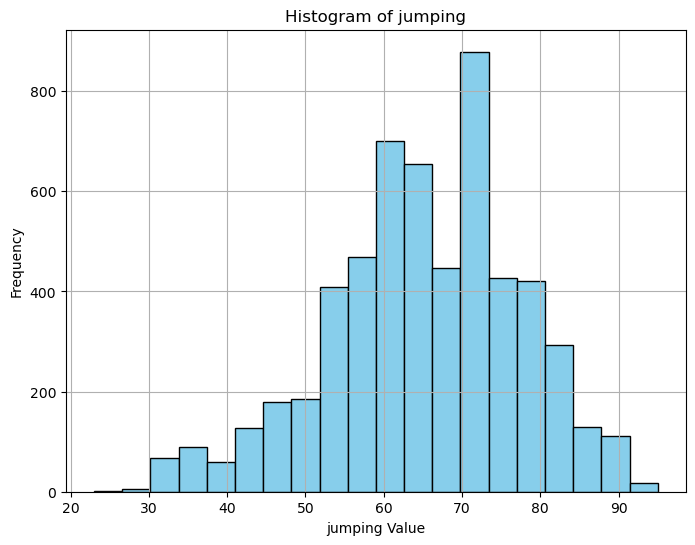

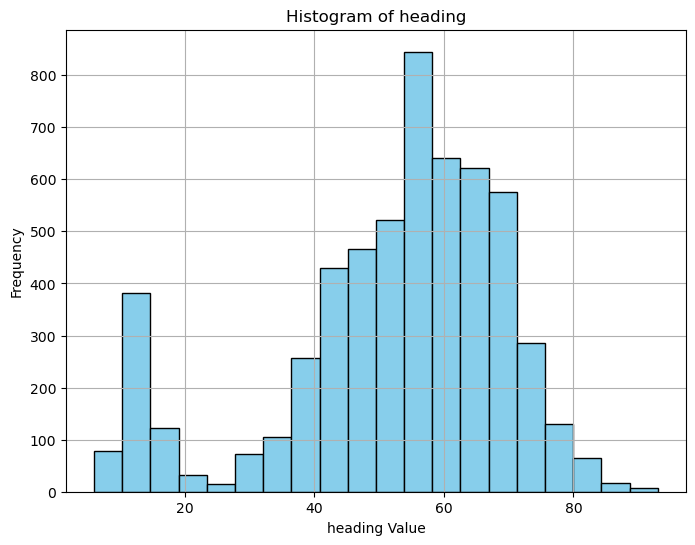

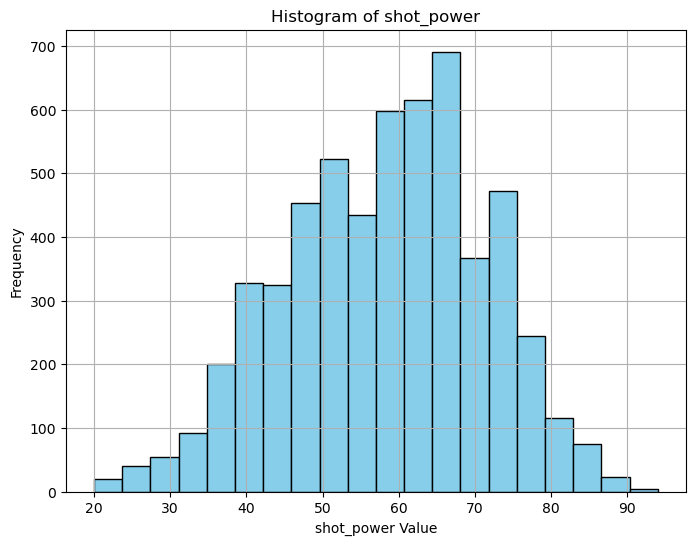

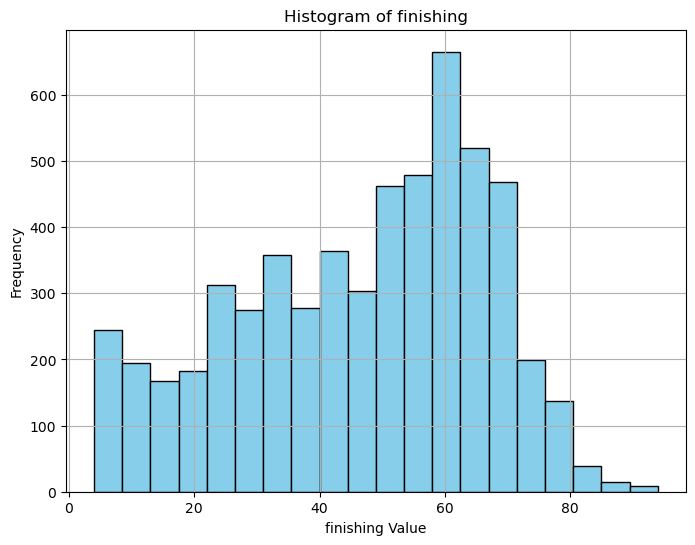

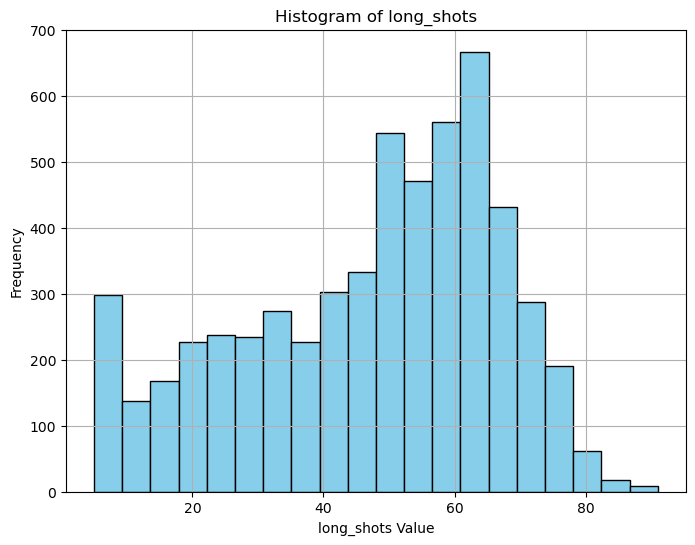

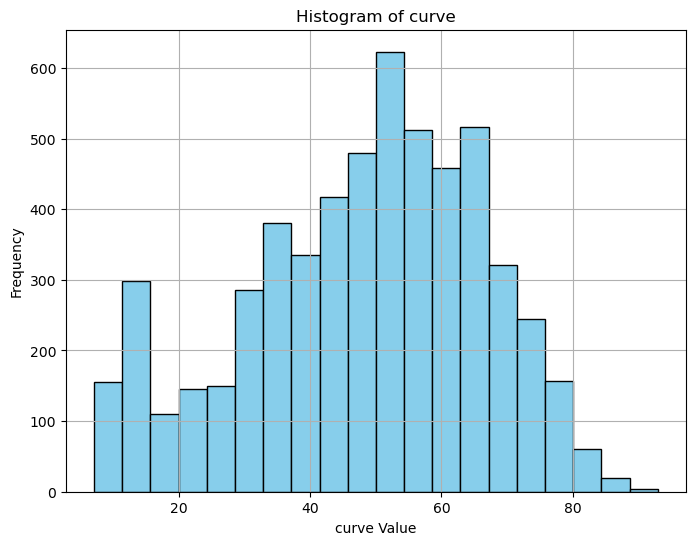

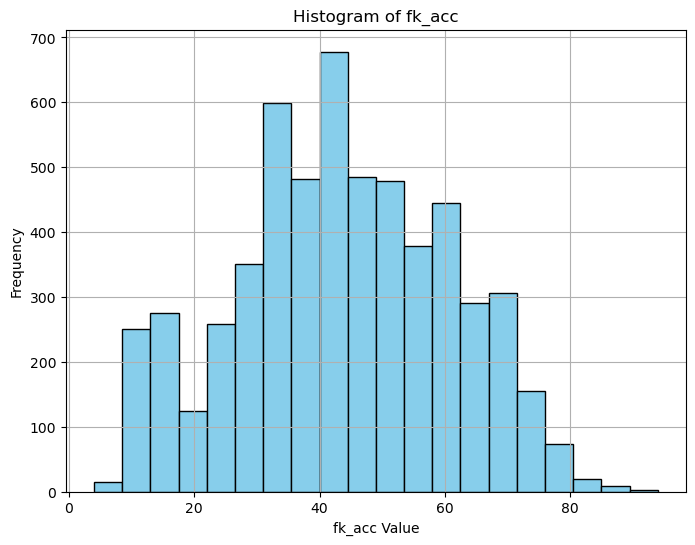

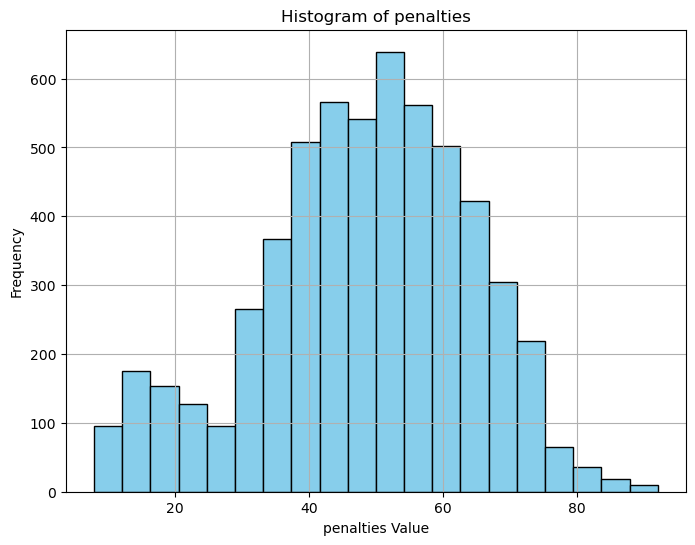

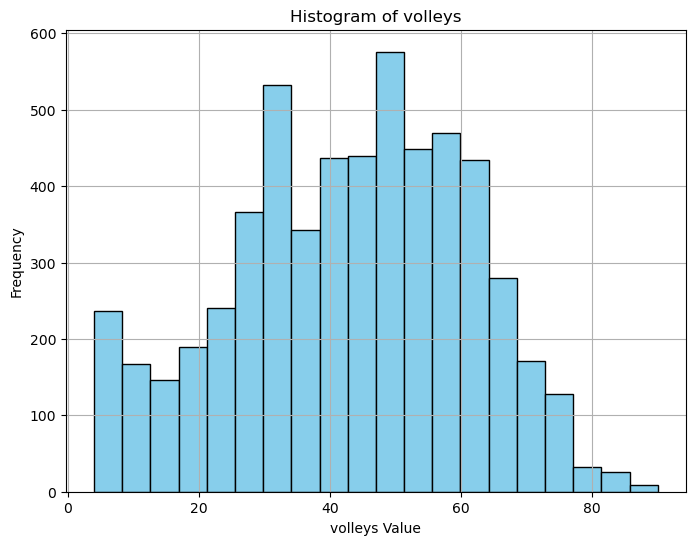

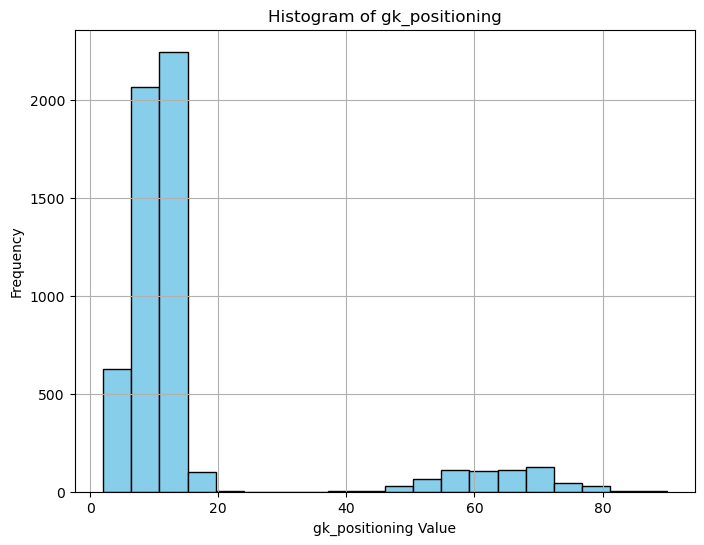

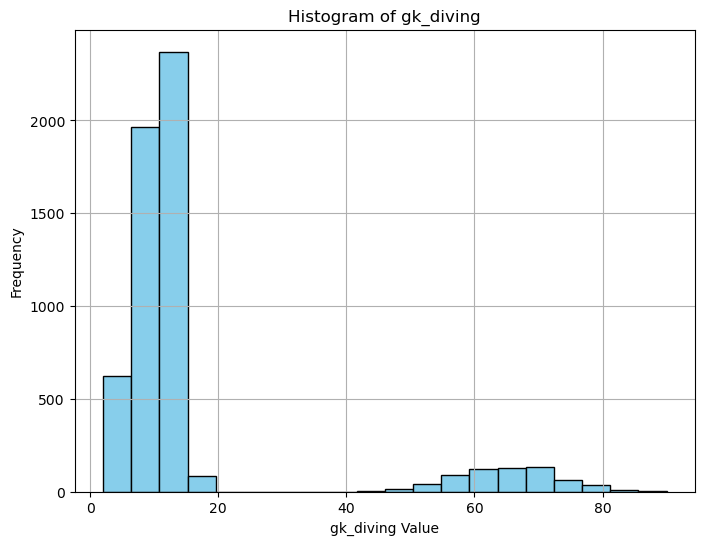

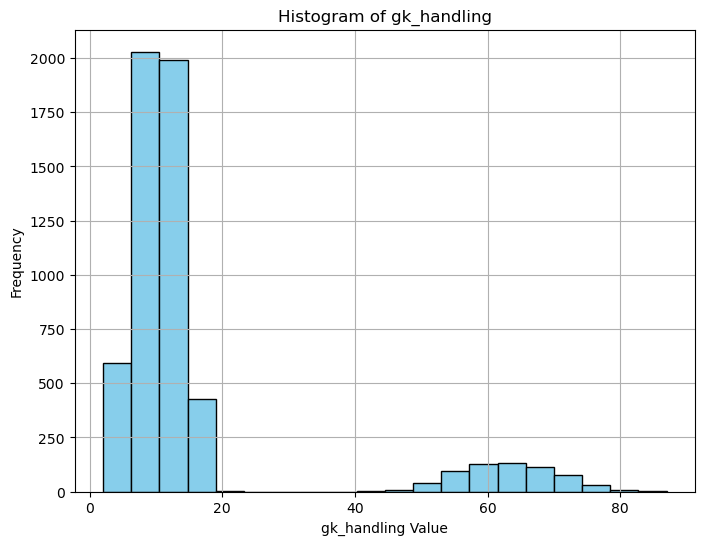

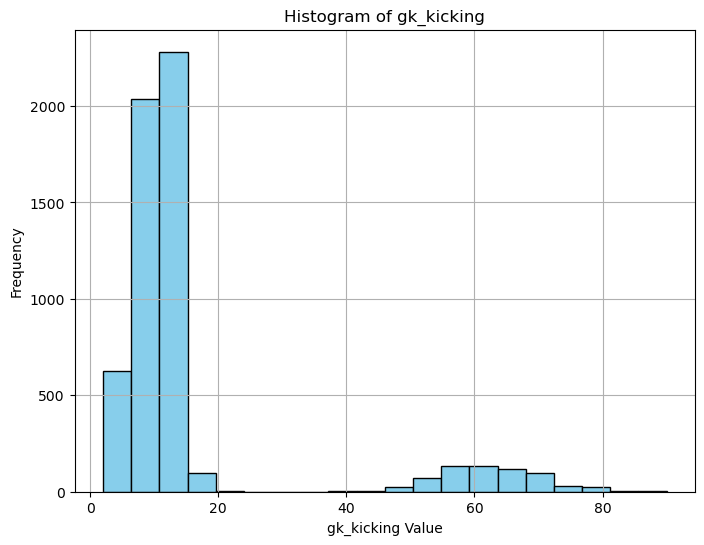

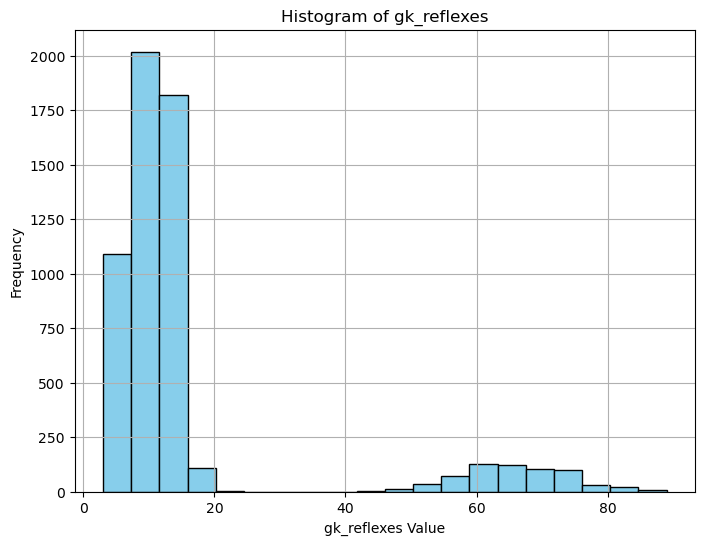

In [16]:
# Histograms
for column in XInts.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.hist(XInts[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(f'{column} Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

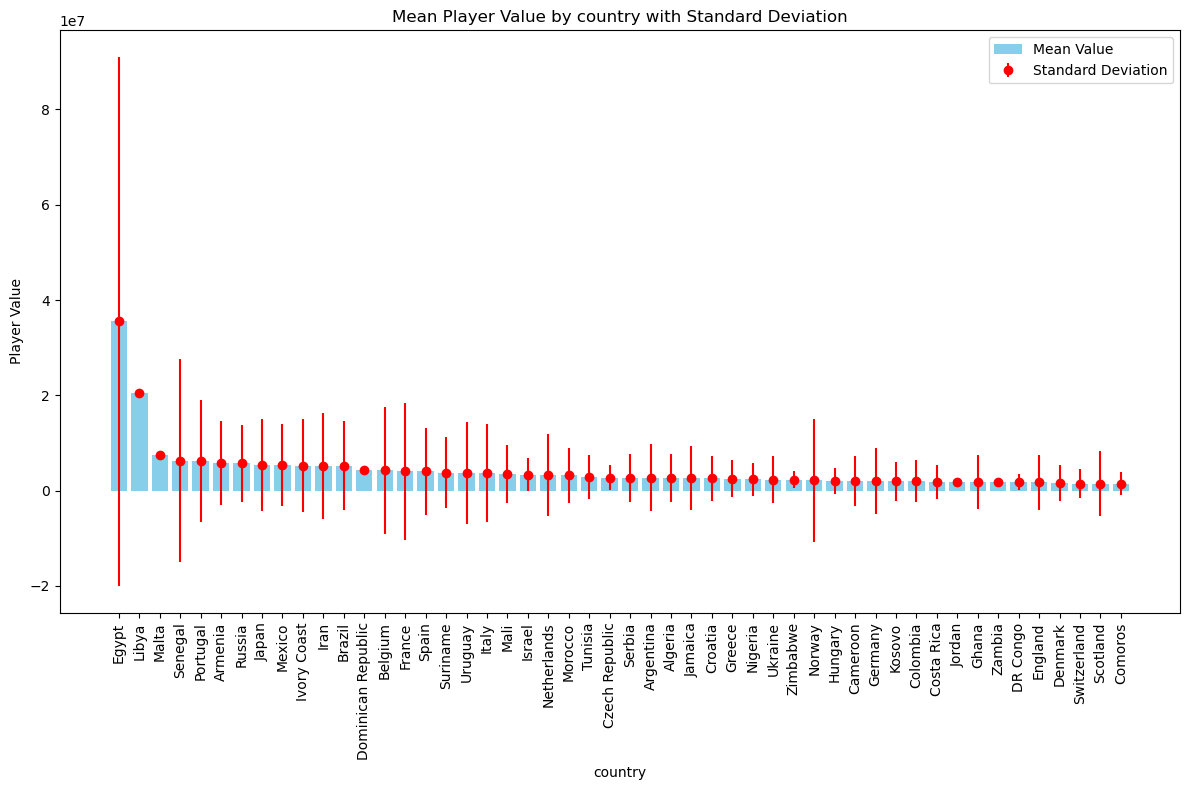

                country          mean      median           std
37                Egypt  3.550333e+07   7000000.0  5.553283e+07
75                Libya  2.050000e+07  20500000.0           NaN
81                Malta  7.500000e+06   7500000.0           NaN
107             Senegal  6.316245e+06   1100000.0  2.128270e+07
100            Portugal  6.179401e+06   1500000.0  1.275270e+07
6               Armenia  5.864167e+06   1500000.0  8.806055e+06
104              Russia  5.780000e+06   5780000.0  8.089302e+06
68                Japan  5.379375e+06   1450000.0  9.637891e+06
84               Mexico  5.364300e+06     80000.0  8.620723e+06
66          Ivory Coast  5.240985e+06   1200000.0  9.781595e+06
62                 Iran  5.201000e+06   1300000.0  1.117784e+07
14               Brazil  5.187901e+06   2100000.0  9.335657e+06
35   Dominican Republic  4.300000e+06   4300000.0           NaN
10              Belgium  4.281276e+06     93750.0  1.337872e+07
43               France  4.047861e+06   

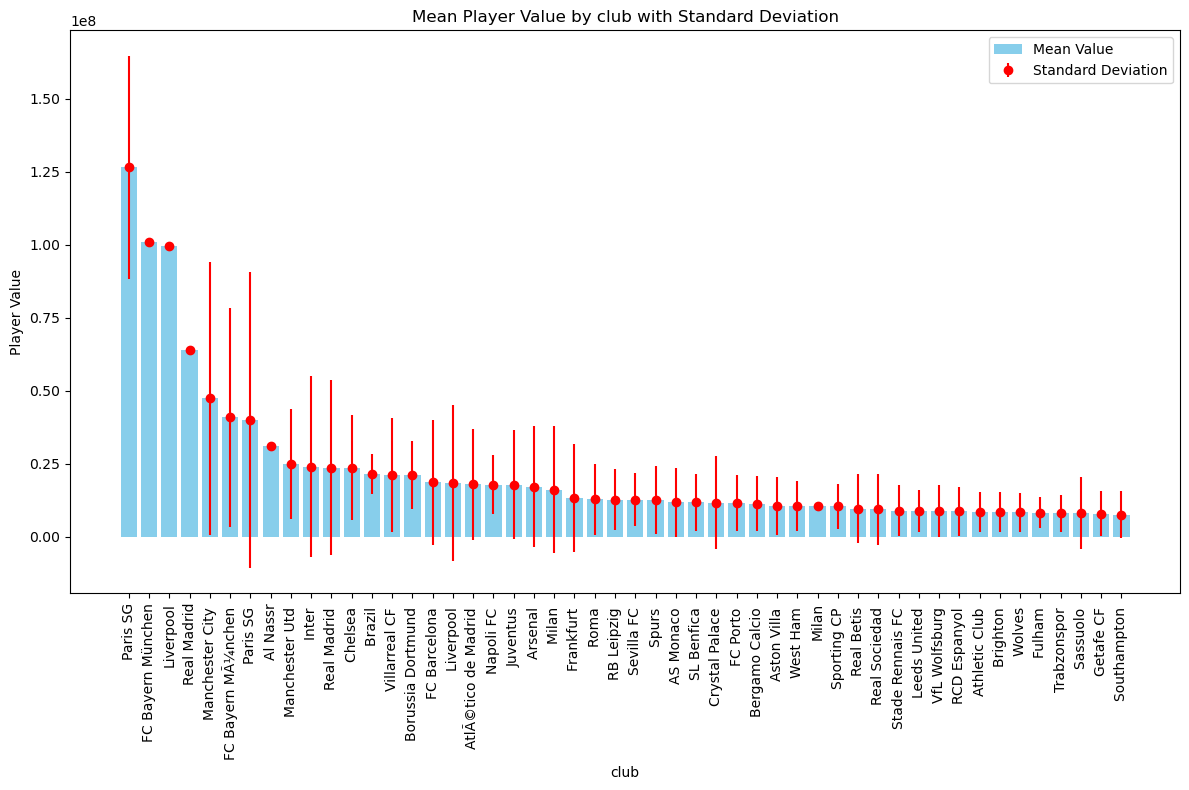

                     club          mean       median           std
454              Paris SG  1.265000e+08  126500000.0  3.818377e+07
210     FC Bayern München  1.010000e+08  101000000.0           NaN
383             Liverpool  9.950000e+07   99500000.0           NaN
501           Real Madrid  6.400000e+07   64000000.0           NaN
395      Manchester City   4.744817e+07   21000000.0  4.671194e+07
209   FC Bayern MÃ¼nchen   4.095430e+07   31000000.0  3.748215e+07
455             Paris SG   4.007250e+07   14250000.0  5.059811e+07
35               Al Nassr  3.100000e+07   31000000.0           NaN
396       Manchester Utd   2.488054e+07   19750000.0  1.881615e+07
332                Inter   2.410036e+07   16000000.0  3.105768e+07
502          Real Madrid   2.373417e+07   17150000.0  2.991699e+07
138              Chelsea   2.372889e+07   27000000.0  1.792244e+07
100               Brazil   2.150000e+07   21500000.0  6.774134e+06
653        Villarreal CF   2.116107e+07   17500000.0  1.954727

In [17]:
#Categorical summary statistics
for column in xStrings.columns:
    
    # Group data by country and compute summary statistics
    summary_stats = df.groupby(column)['value'].agg(['mean', 'median', 'std']).reset_index()

    # Sort the summary statistics by mean player value and get top 50 for better visualization
    summary_stats = summary_stats.sort_values(by='mean', ascending=False).head(50)

    # Create a bar plot to visualize mean player value by category
    plt.figure(figsize=(12, 8))
    plt.bar(summary_stats[column], summary_stats['mean'], color='skyblue', label='Mean Value')
    plt.errorbar(summary_stats[column], summary_stats['mean'], yerr=summary_stats['std'], fmt='o', color='red', label='Standard Deviation')
    plt.xlabel(column)
    plt.ylabel('Player Value')
    plt.title(f'Mean Player Value by {column} with Standard Deviation')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Display the summary statistics table
    print(summary_stats)